
# Problem statement : 
    
The used car market has been in the auto market for years, but due to risky and unorganized nature of buying used cars without any warranty, and due to lack of certification of used cars, the pre-owned car business has been unable to become a significant part of the auto industry. From
the last four years, with major car manufacturers entering intothe pre-owned car business in a big way. 
The competition between pre-owned cars and new cars has reached its peak. 
All these pre-owned cars are generally termed as “Certified Used Cars”, as they are provided warranty and certified quality from the car dealers. 
Different car manufacturers have entered the pre-owned car business with different objectives, and they have different marketing strategies and priorities in entering into the pre-owned car business.
Review of Literature
A used car can be much cheaper than its new counterpart.
The depreciation is lesser and car financing too can be obtained easily. A survey was conducted and it was revealed that
the demand for the used car market in India per year is 1.4 million cars (Carazoo 2012).

# Business goal: 
 To build a Machine learning model for predicting the price of used cars 

In [1]:
import pandas as pd 
import numpy as np 
import pandas_profiling as pp
import sweetviz as sv
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib notebook 

In [2]:
data = pd.read_excel("Data3.xlsx")
data.head()

Unnamed: 0  Index                         Car Name  Kms driven  \
0           0      0                 BMW 520 d 140 kW       32125   
1           1      1  Kia Sorento 2.2 CRDi AWD 147 kW       63400   
2           2      2          Opel Grandland X 147 kW        2700   
3           3      3                 BMW 320 d 140 kW       26145   
4           4      4      BMW 320 d Sport Line 140 kW       28199   

   First registration Transmission Fuel_type      Vendor Location  \
0                   3    Automatic    Diesel  Dealership  Germany   
1                   4    Automatic    Diesel  Dealership  Germany   
2                   2    Automatic    Hybrid  Dealership    Italy   
3                   1    Automatic    Diesel  Dealership  Germany   
4                   1    Automatic    Diesel  Dealership  Germany   

   Price in Euro With or without Tax Drive type  features_score  Power in kW  
0        32899.0     without 21% VAT        2x4               2          140  
1        34649.0     without 21% VAT        4x4               2          147  
2        35349.0     without 21% VAT        4x4               2          147  
3        39349.0     without 21% VAT        2x4               2          140  
4        40099.0     without 21% VAT        2x4               2          140

In [3]:
labels =["X","X1","Car_name","Kms_driven","Age","Transmisson","Fuel_type","Vendor","Location","Price_Euro","Tax","Drive_type","Feature_score","Power_kW"]

In [4]:
# Renaming the labels of the dataframe
data = pd.read_excel("Data3.xlsx", names= labels)
data.head(5)

X  X1                         Car_name  Kms_driven  Age Transmisson  \
0  0   0                 BMW 520 d 140 kW       32125    3   Automatic   
1  1   1  Kia Sorento 2.2 CRDi AWD 147 kW       63400    4   Automatic   
2  2   2          Opel Grandland X 147 kW        2700    2   Automatic   
3  3   3                 BMW 320 d 140 kW       26145    1   Automatic   
4  4   4      BMW 320 d Sport Line 140 kW       28199    1   Automatic   

  Fuel_type      Vendor Location  Price_Euro              Tax Drive_type  \
0    Diesel  Dealership  Germany     32899.0  without 21% VAT        2x4   
1    Diesel  Dealership  Germany     34649.0  without 21% VAT        4x4   
2    Hybrid  Dealership    Italy     35349.0  without 21% VAT        4x4   
3    Diesel  Dealership  Germany     39349.0  without 21% VAT        2x4   
4    Diesel  Dealership  Germany     40099.0  without 21% VAT        2x4   

   Feature_score  Power_kW  
0              2       140  
1              2       147  
2              2       147  
3              2       140  
4              2       140

In [5]:
#Dropping the unnecessary columns 
data1= data.drop(["X","X1"], axis = 1)
data1.head(2)

Car_name  Kms_driven  Age Transmisson Fuel_type  \
0                 BMW 520 d 140 kW       32125    3   Automatic    Diesel   
1  Kia Sorento 2.2 CRDi AWD 147 kW       63400    4   Automatic    Diesel   

       Vendor Location  Price_Euro              Tax Drive_type  Feature_score  \
0  Dealership  Germany     32899.0  without 21% VAT        2x4              2   
1  Dealership  Germany     34649.0  without 21% VAT        4x4              2   

   Power_kW  
0       140  
1       147

In [6]:
data1.shape

(9978, 12)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_name       9978 non-null   object 
 1   Kms_driven     9978 non-null   int64  
 2   Age            9978 non-null   int64  
 3   Transmisson    9978 non-null   object 
 4   Fuel_type      9940 non-null   object 
 5   Vendor         9978 non-null   object 
 6   Location       9978 non-null   object 
 7   Price_Euro     9977 non-null   float64
 8   Tax            9978 non-null   object 
 9   Drive_type     9978 non-null   object 
 10  Feature_score  9978 non-null   int64  
 11  Power_kW       9978 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 935.6+ KB


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


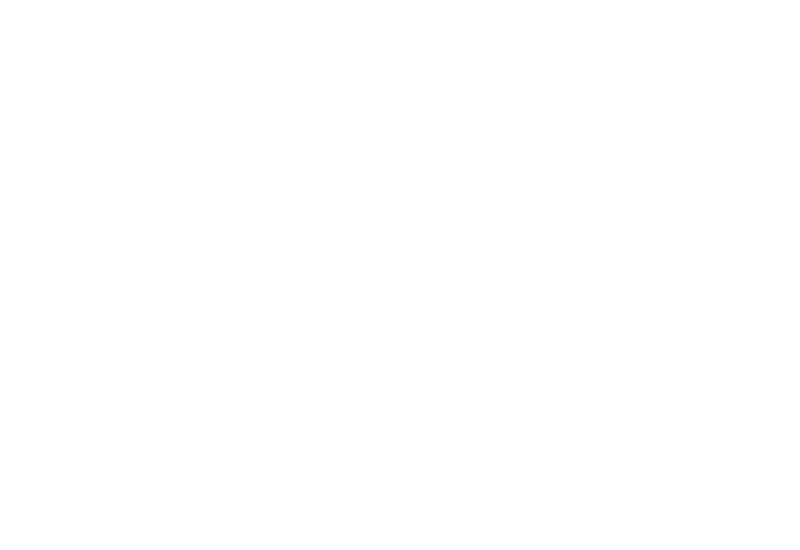

<IPython.core.display.Javascript object>


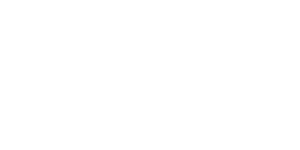

<IPython.core.display.Javascript object>


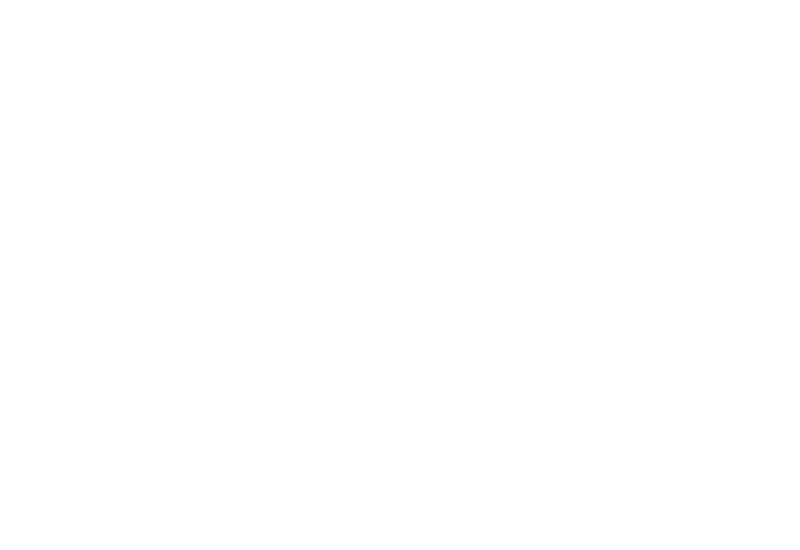

<IPython.core.display.Javascript object>


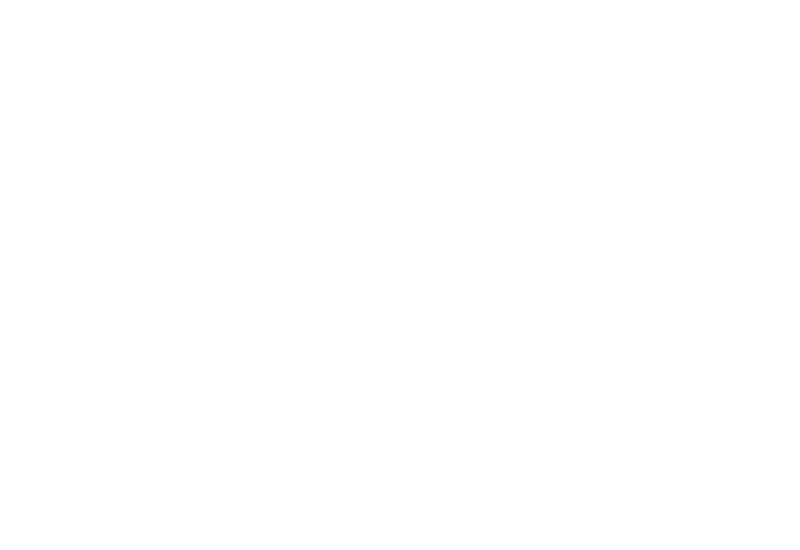

<IPython.core.display.Javascript object>


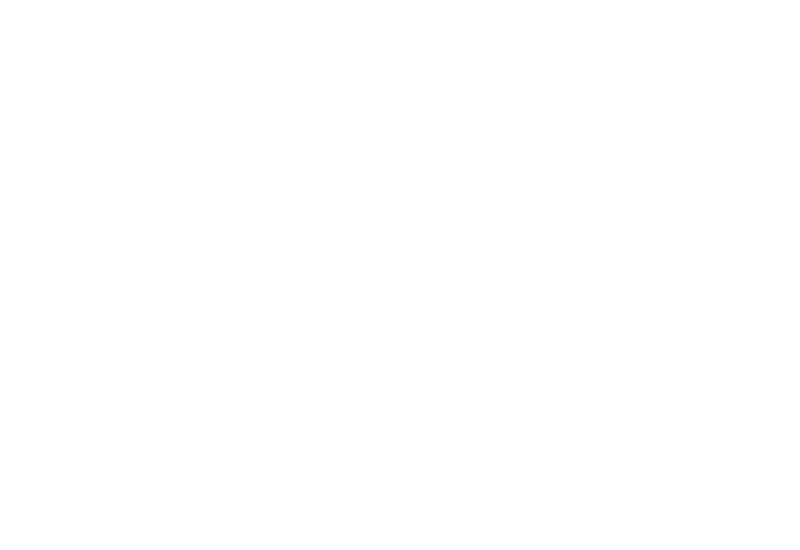

<IPython.core.display.Javascript object>


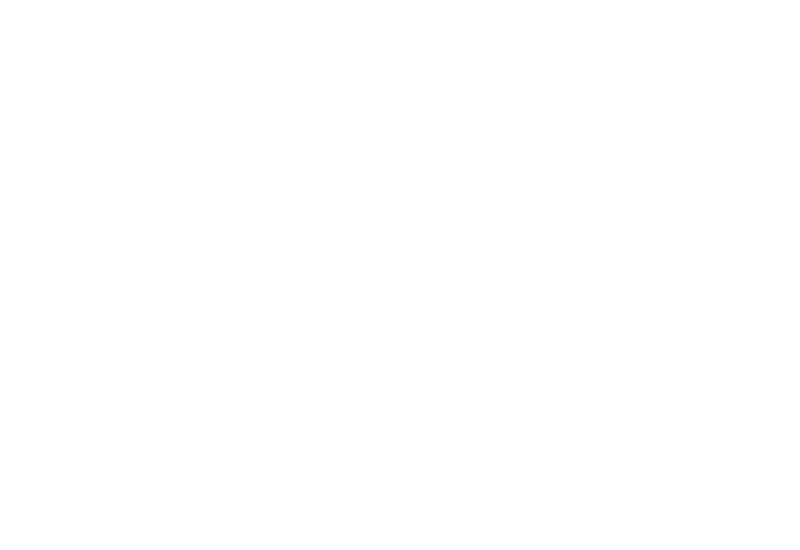

<IPython.core.display.Javascript object>


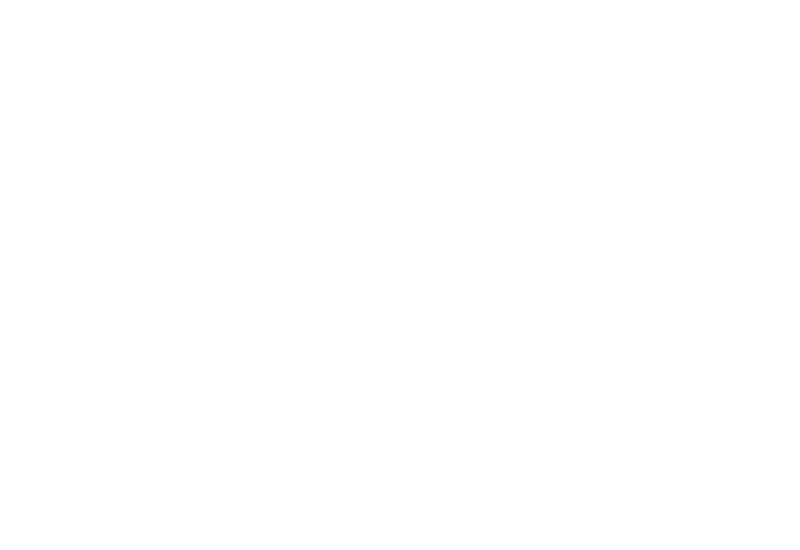

<IPython.core.display.Javascript object>


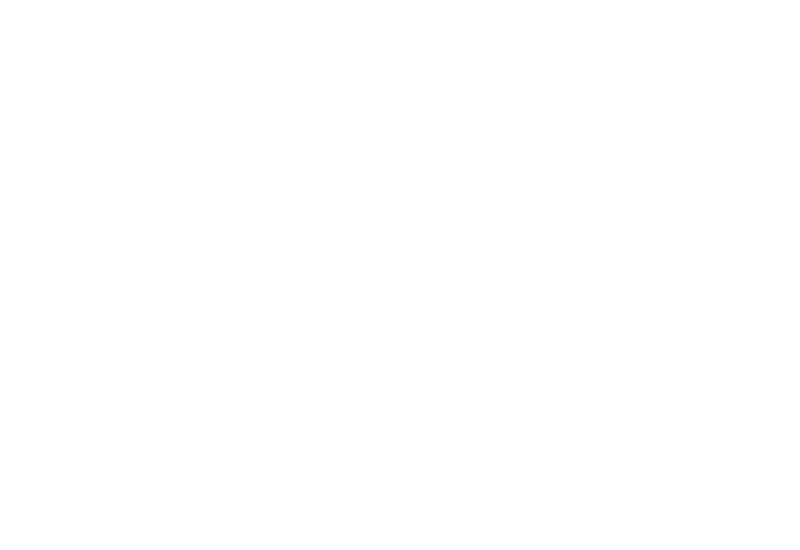

<IPython.core.display.Javascript object>


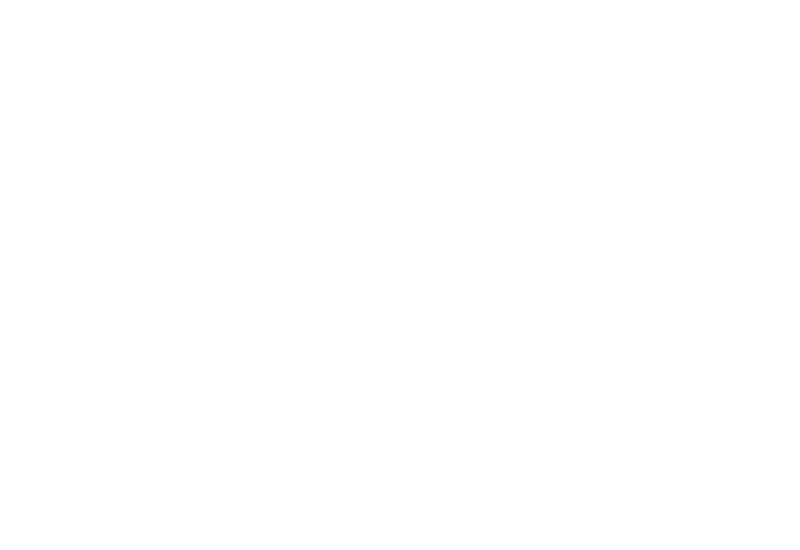

<IPython.core.display.Javascript object>


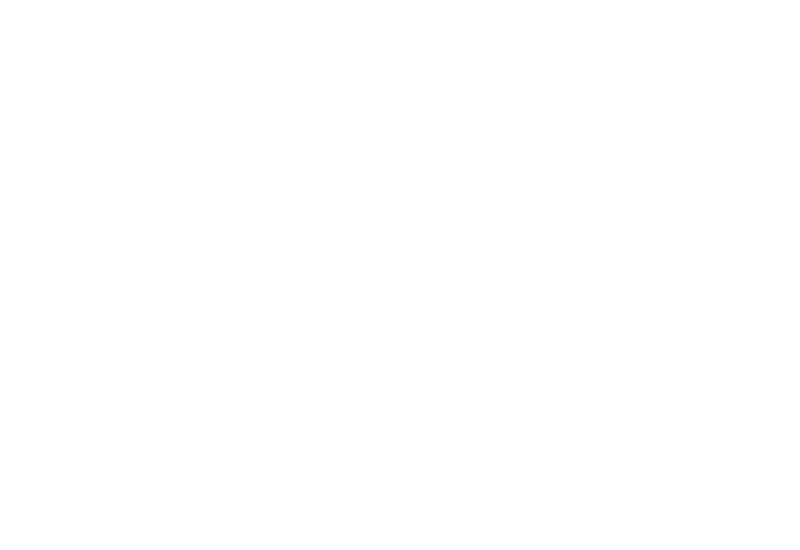

<IPython.core.display.Javascript object>


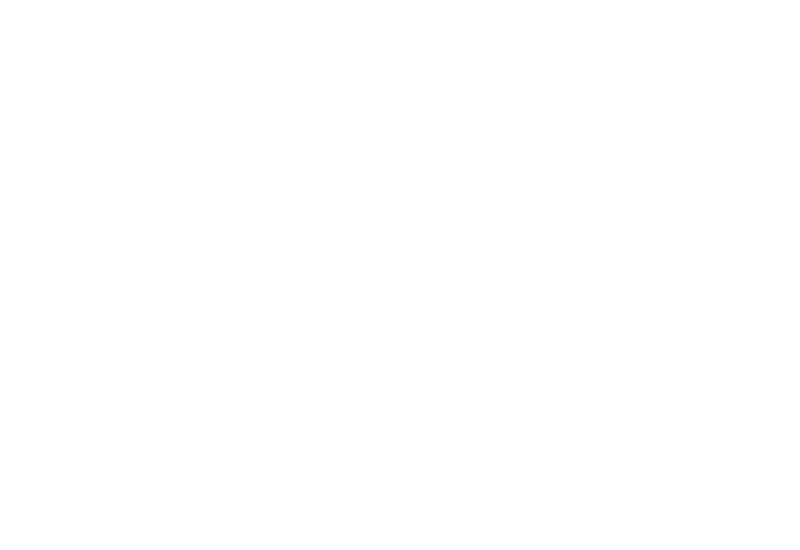

<IPython.core.display.Javascript object>


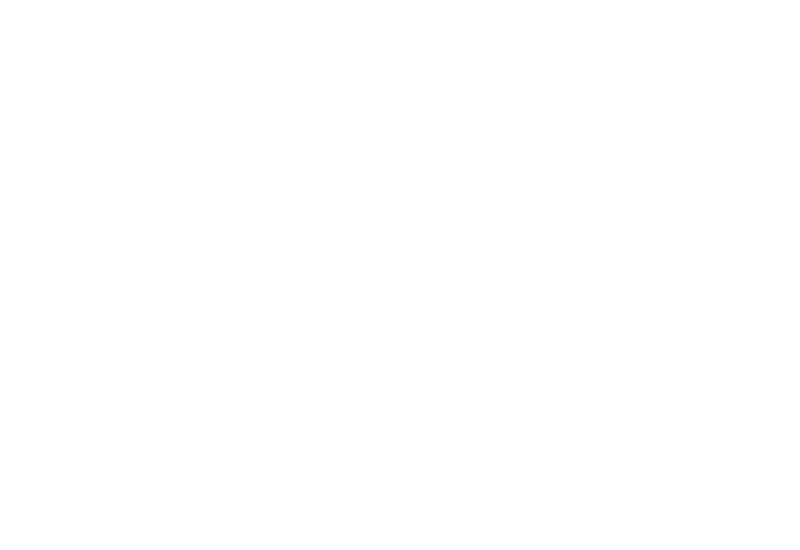

<IPython.core.display.Javascript object>


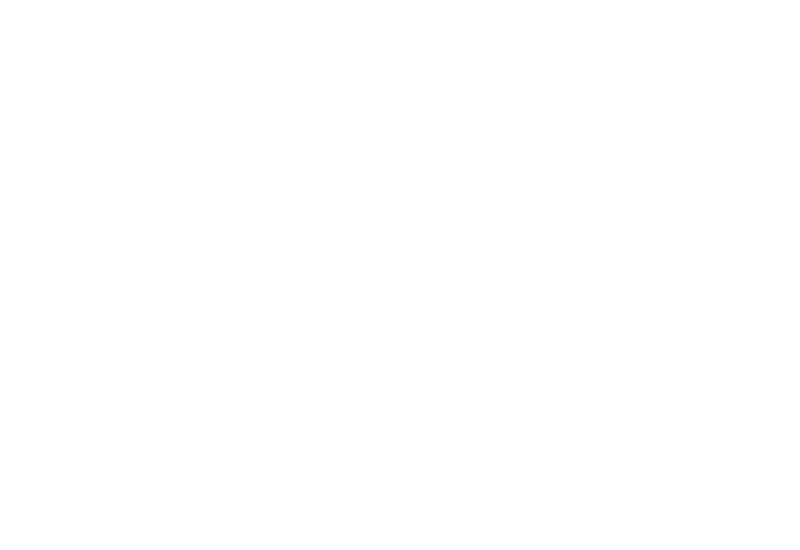

<IPython.core.display.Javascript object>


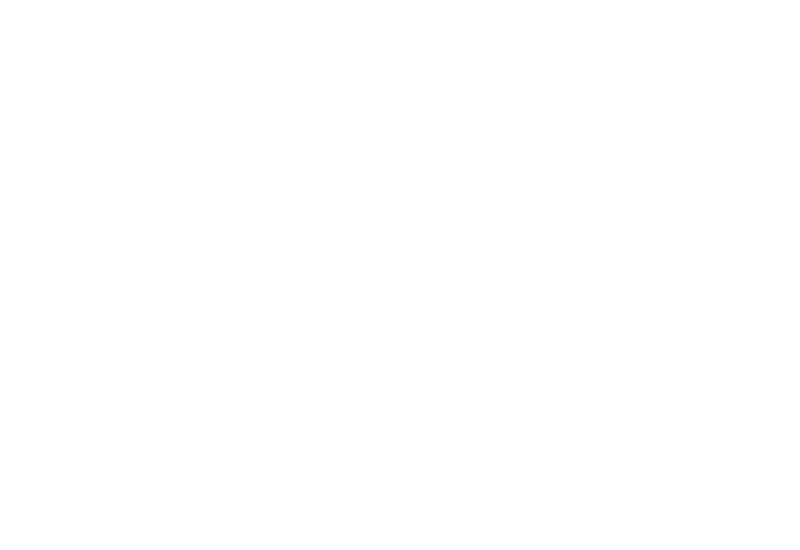

<IPython.core.display.Javascript object>


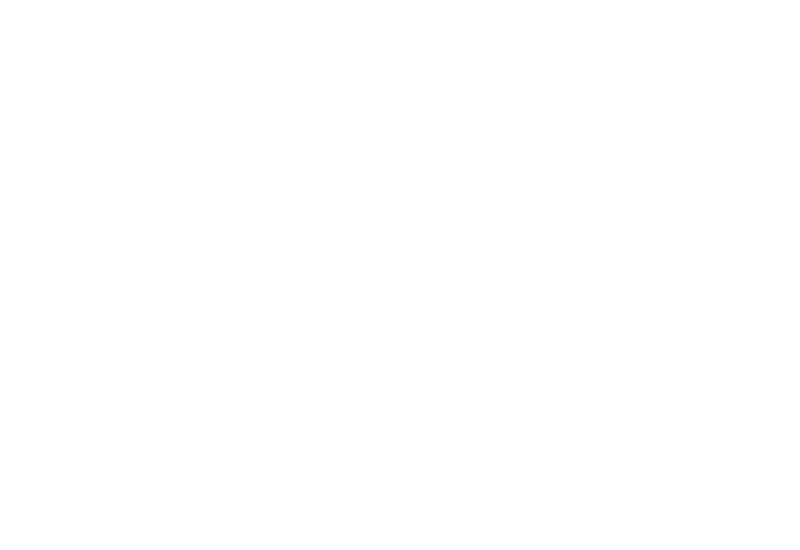

<IPython.core.display.Javascript object>


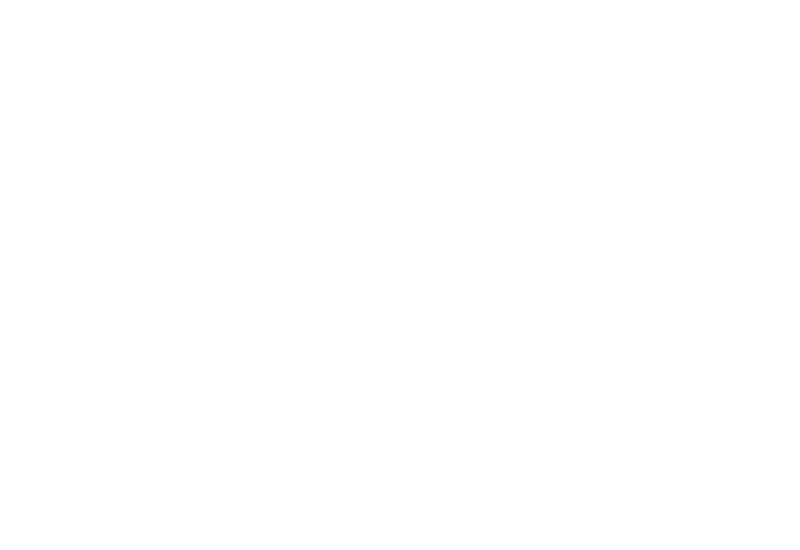

<IPython.core.display.Javascript object>


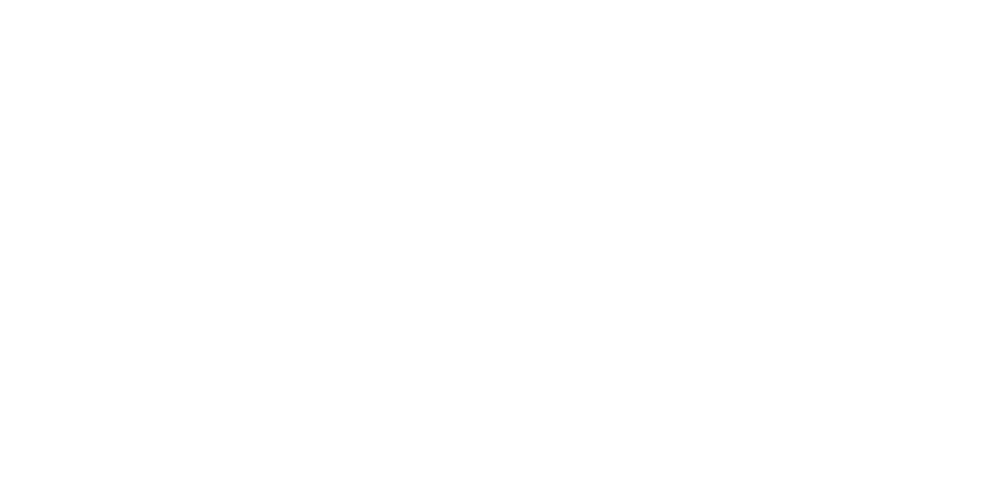

<IPython.core.display.Javascript object>


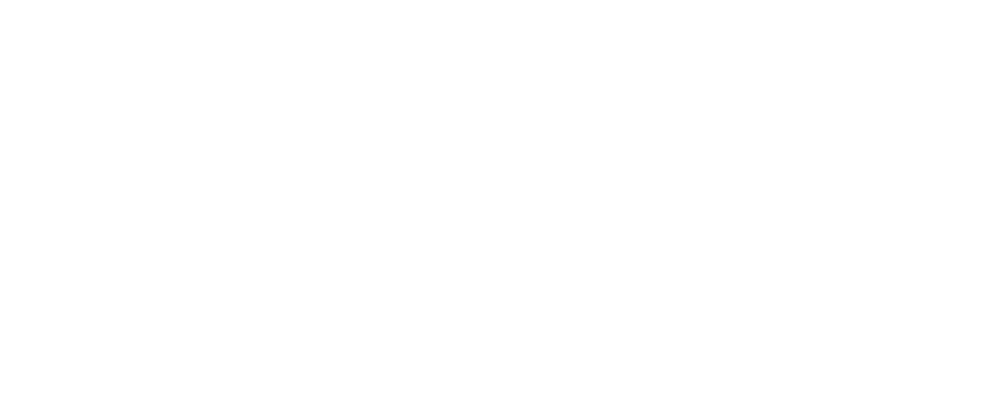

<IPython.core.display.Javascript object>


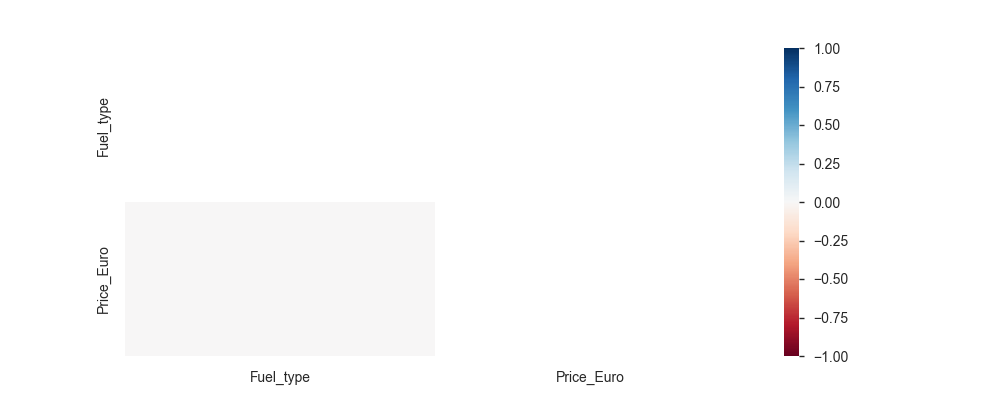

<IPython.core.display.Javascript object>


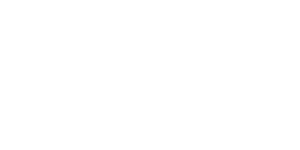

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


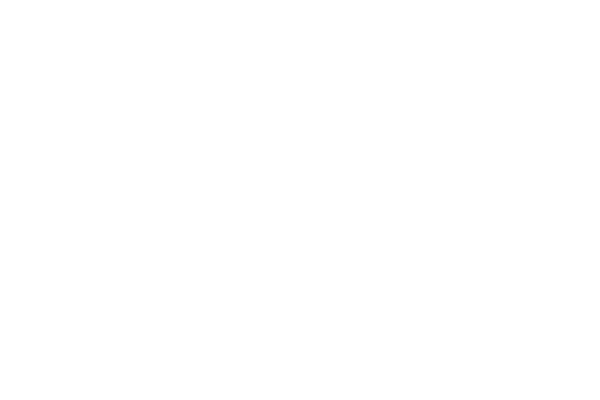

<IPython.core.display.Javascript object>


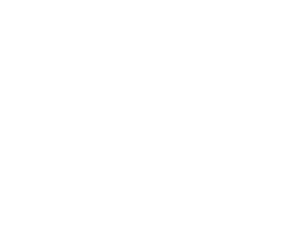

<IPython.core.display.Javascript object>


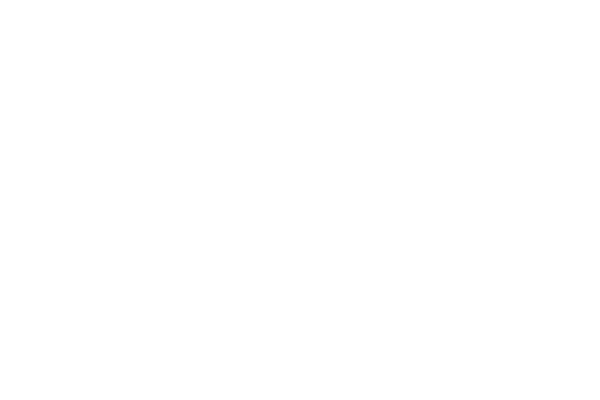

<IPython.core.display.Javascript object>


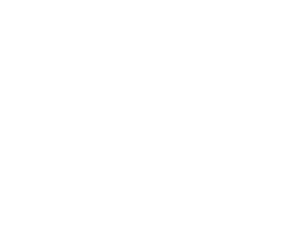

<IPython.core.display.Javascript object>


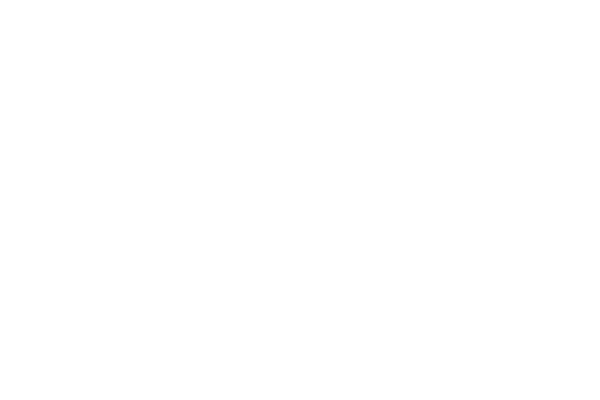

<IPython.core.display.Javascript object>


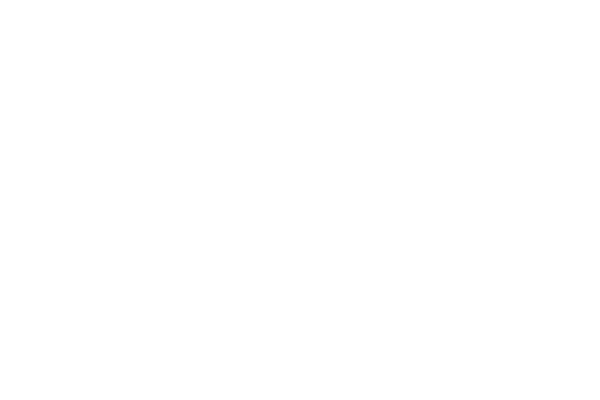

<IPython.core.display.Javascript object>


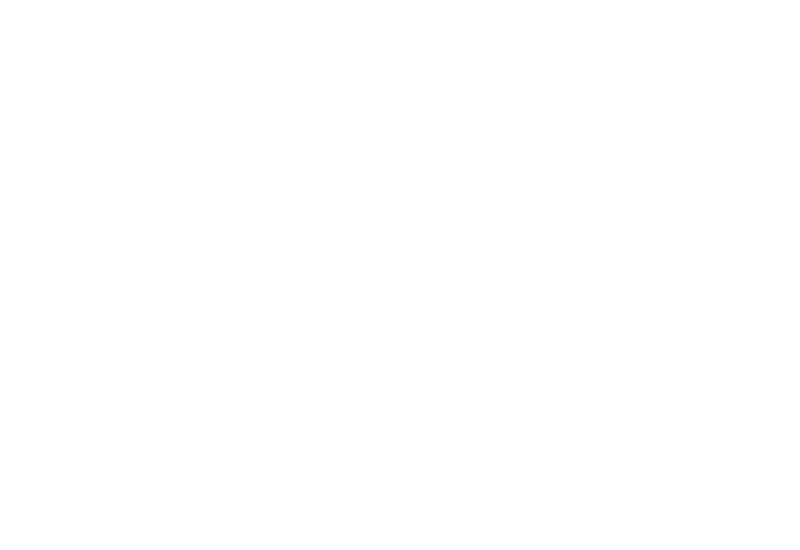

<IPython.core.display.Javascript object>


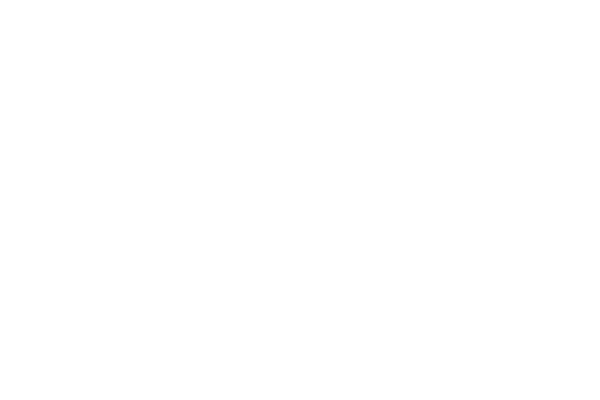

<IPython.core.display.Javascript object>


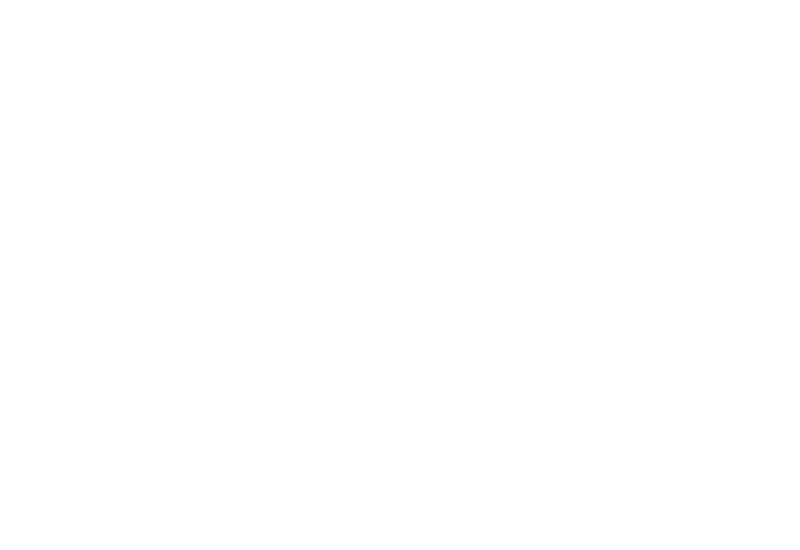

<IPython.core.display.Javascript object>


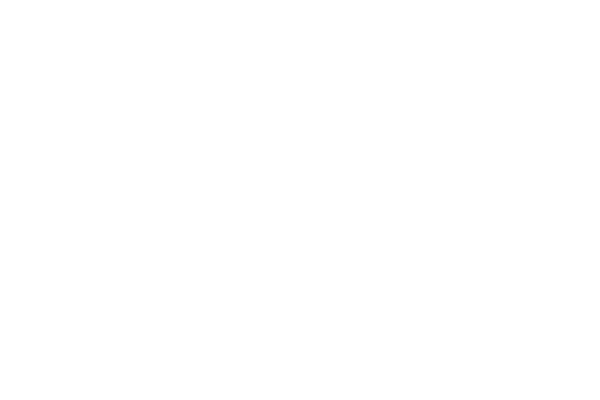

<IPython.core.display.Javascript object>


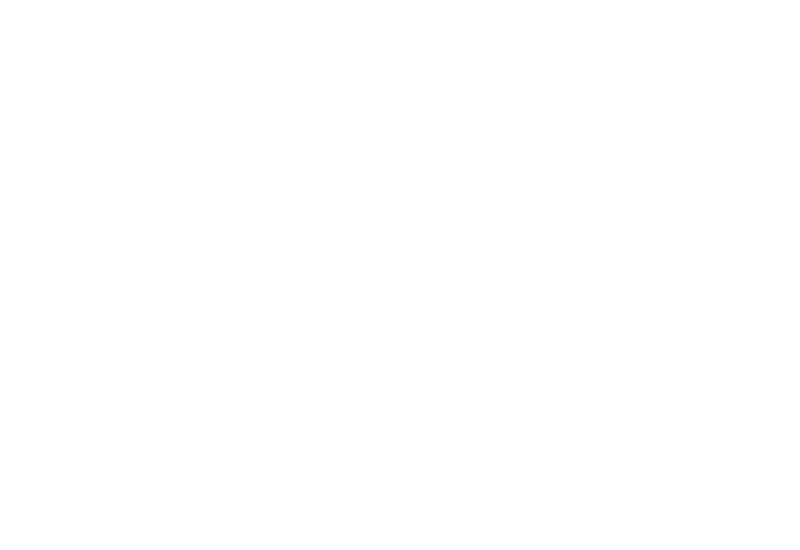

<IPython.core.display.Javascript object>


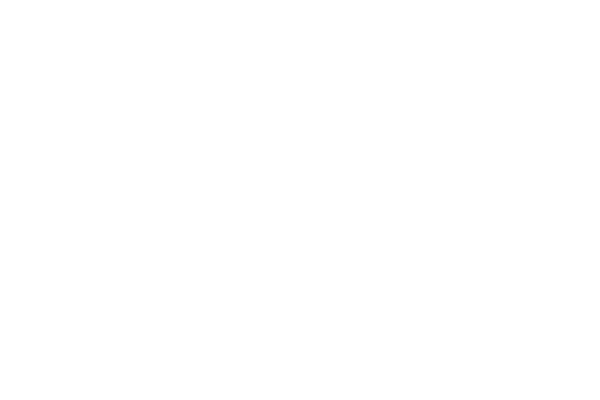

<IPython.core.display.Javascript object>


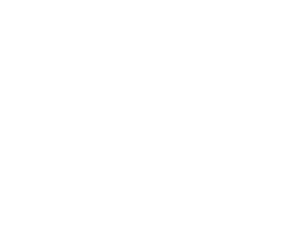

<IPython.core.display.Javascript object>


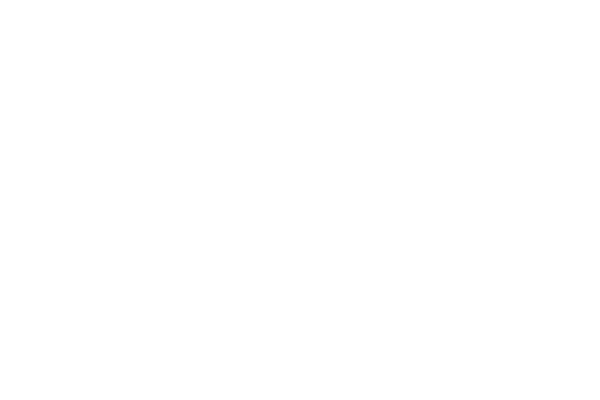

<IPython.core.display.Javascript object>


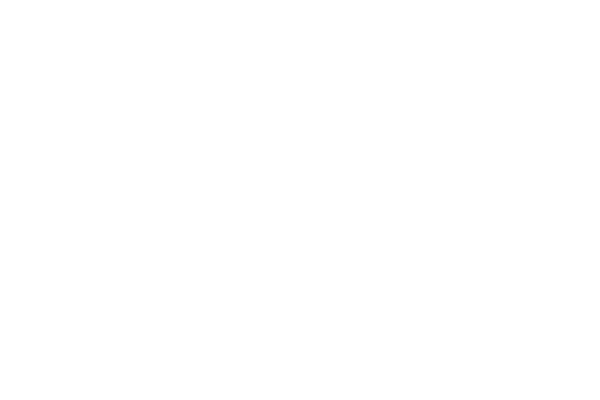

<IPython.core.display.Javascript object>


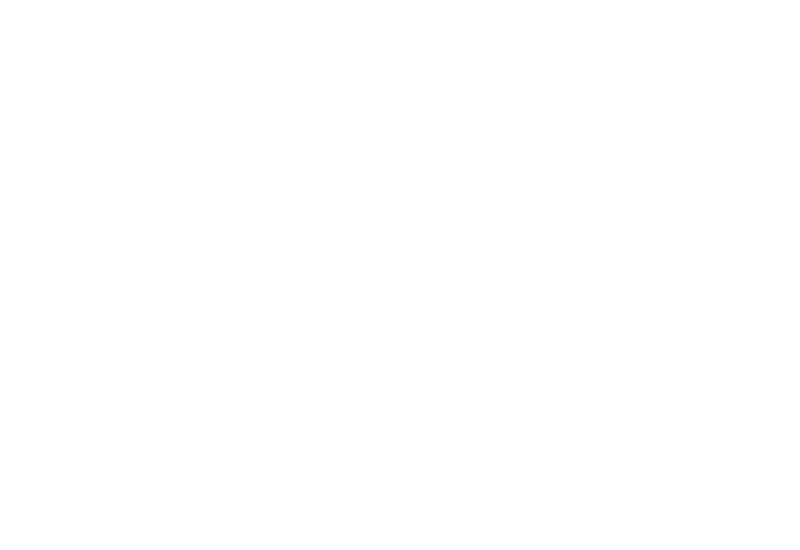

<IPython.core.display.Javascript object>


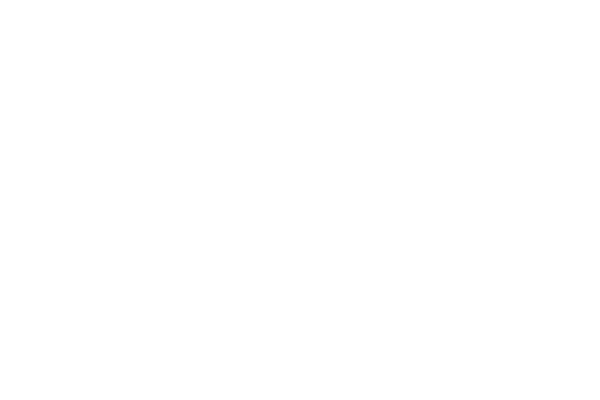

<IPython.core.display.Javascript object>


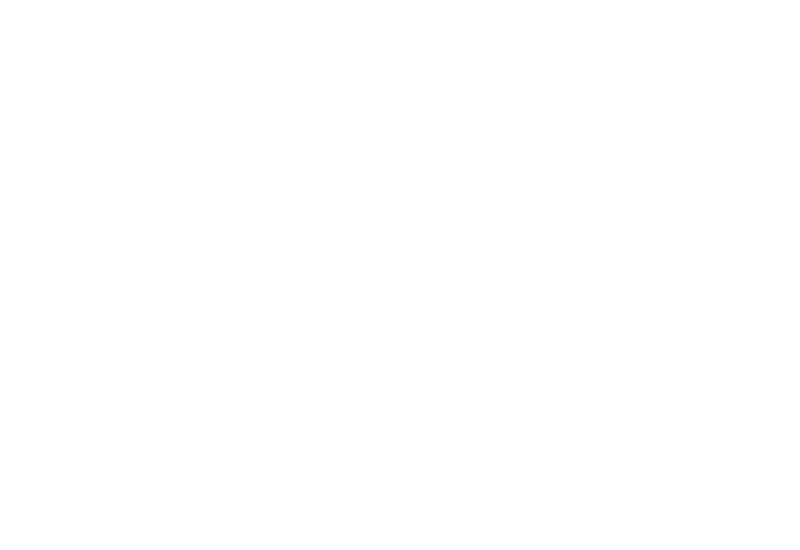

<IPython.core.display.Javascript object>


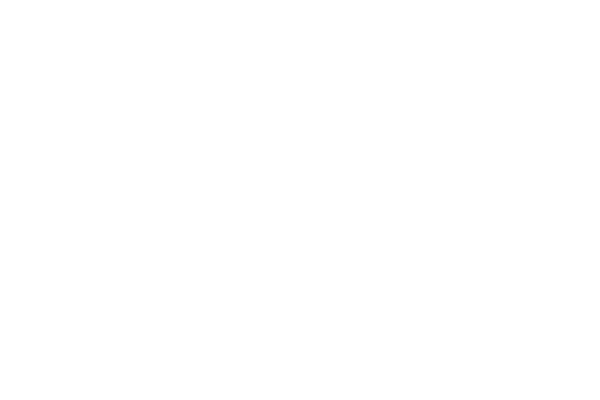

<IPython.core.display.Javascript object>


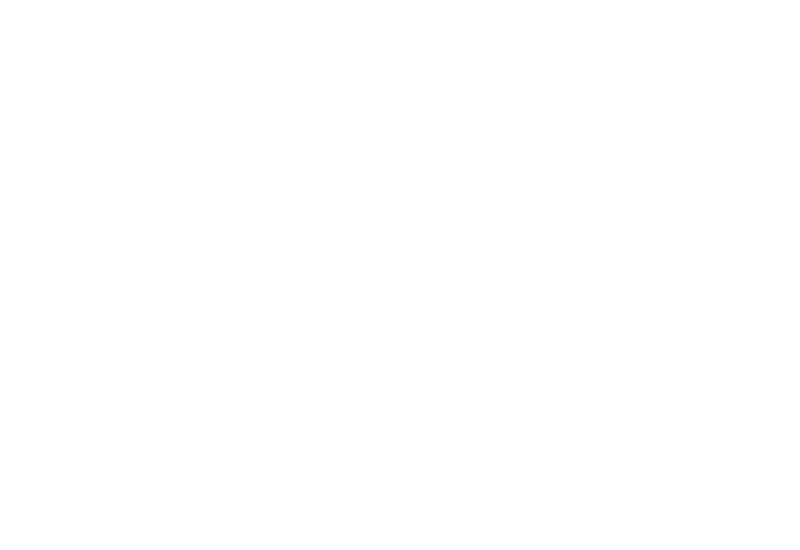

<IPython.core.display.Javascript object>


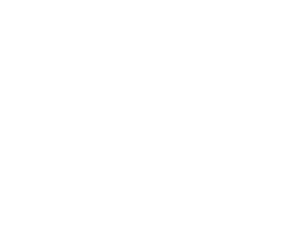

<IPython.core.display.Javascript object>


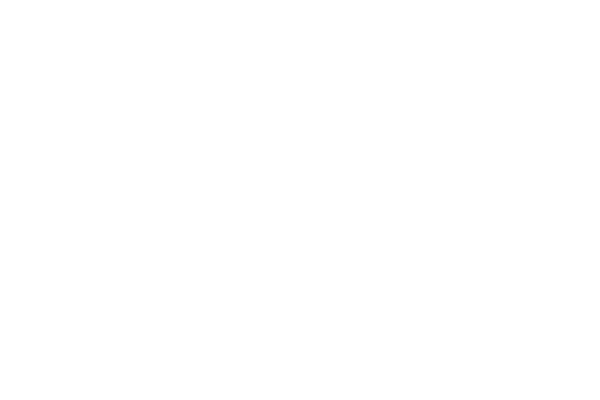

<IPython.core.display.Javascript object>


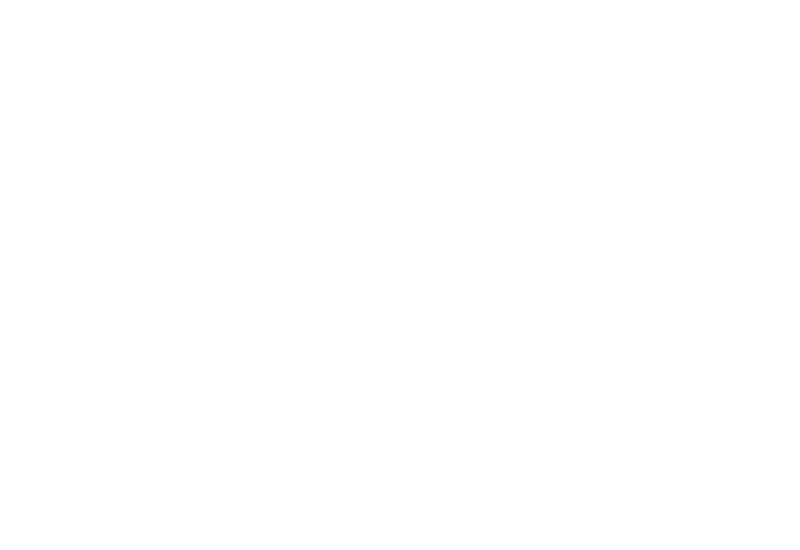

<IPython.core.display.Javascript object>


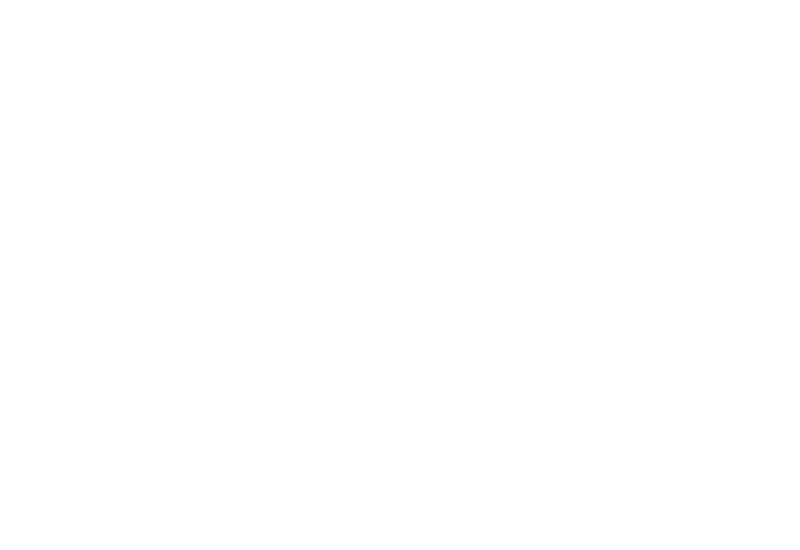

<IPython.core.display.Javascript object>


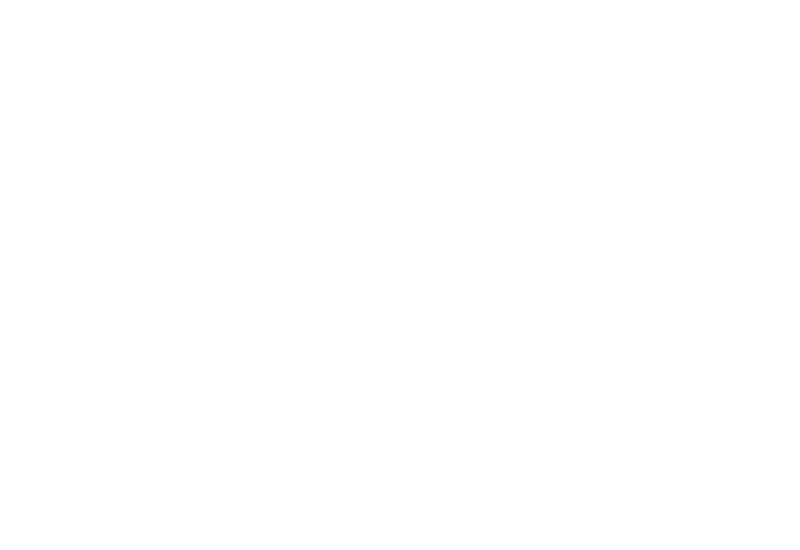

<IPython.core.display.Javascript object>


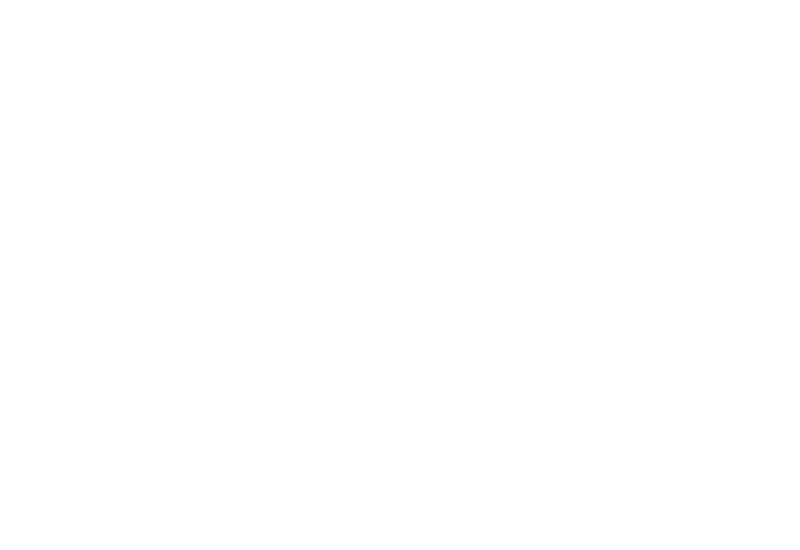

<IPython.core.display.Javascript object>


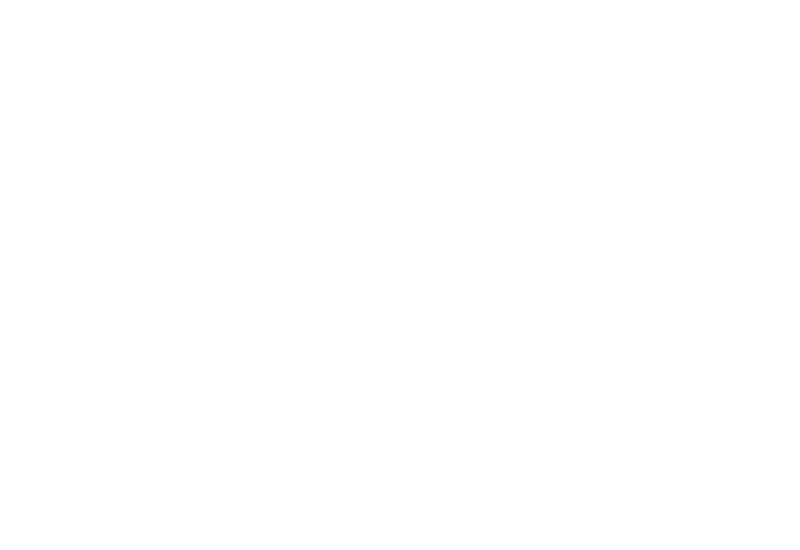

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
EDA_report= pp.ProfileReport(data1)
EDA_report.to_file(output_file='report.html')

                                             |                                             | [  0%]   00:00 ->…

<IPython.core.display.Javascript object>


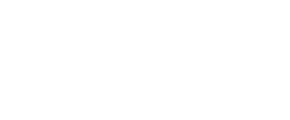

<IPython.core.display.Javascript object>


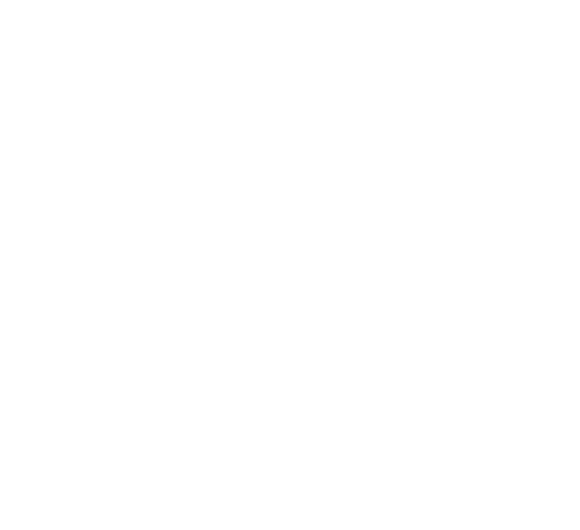

<IPython.core.display.Javascript object>


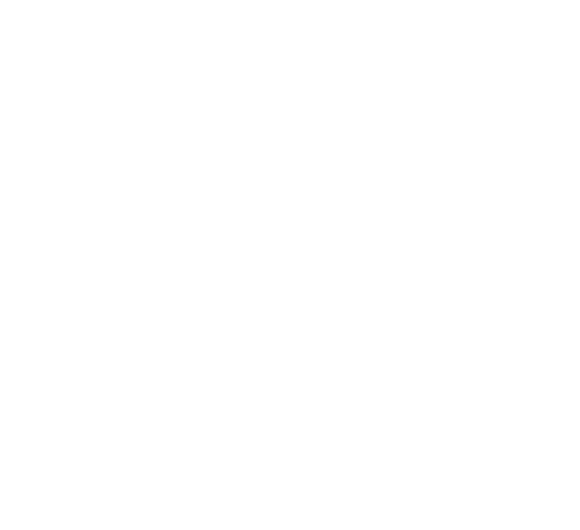

<IPython.core.display.Javascript object>


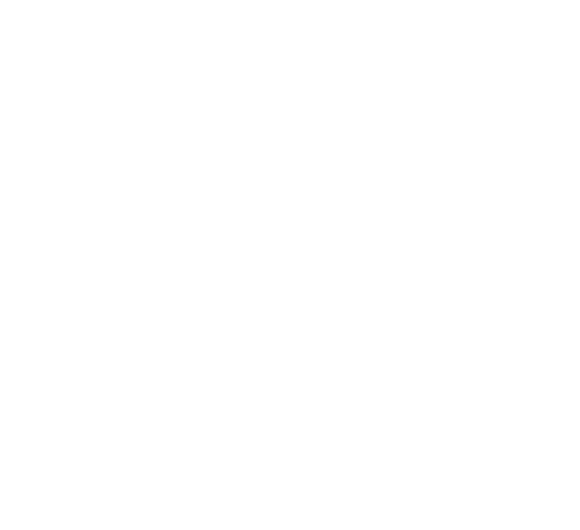

<IPython.core.display.Javascript object>


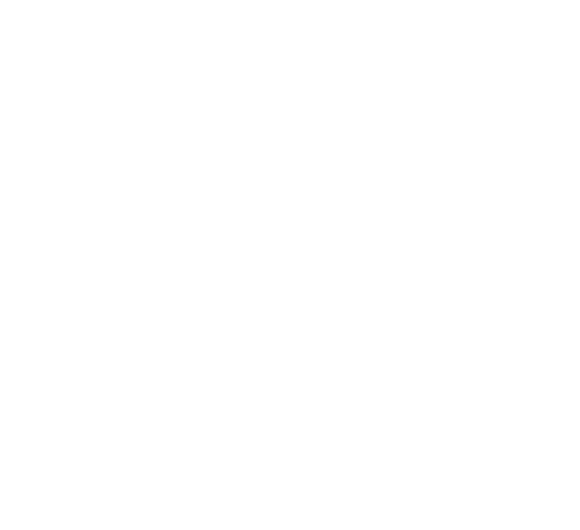

<IPython.core.display.Javascript object>


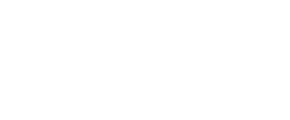

<IPython.core.display.Javascript object>


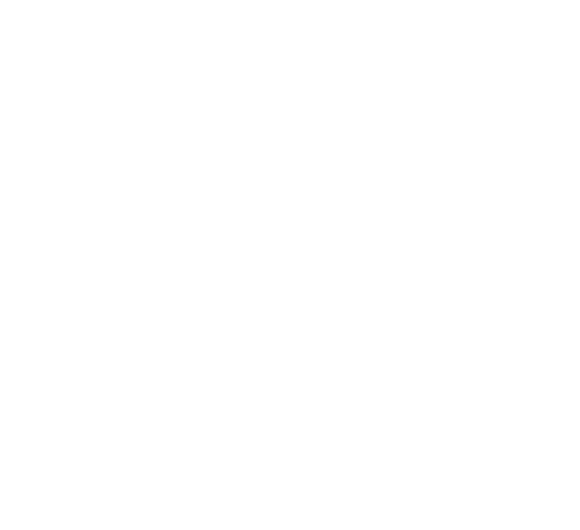

<IPython.core.display.Javascript object>


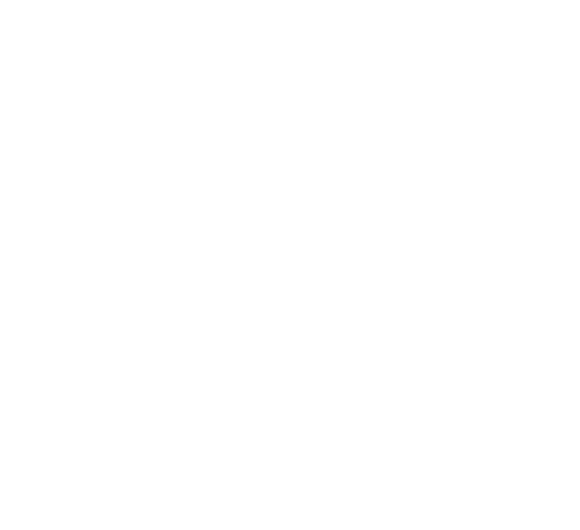

<IPython.core.display.Javascript object>


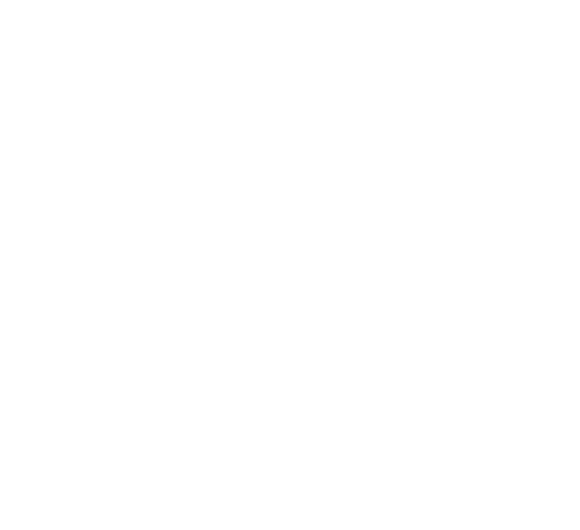

<IPython.core.display.Javascript object>


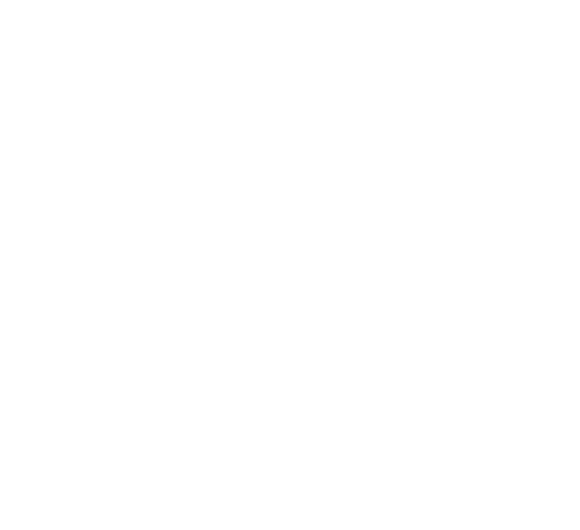

<IPython.core.display.Javascript object>


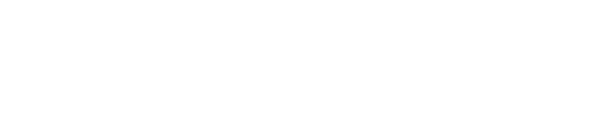

<IPython.core.display.Javascript object>


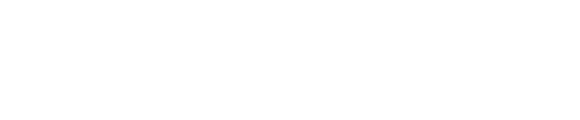

<IPython.core.display.Javascript object>


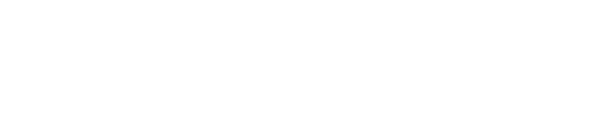

<IPython.core.display.Javascript object>


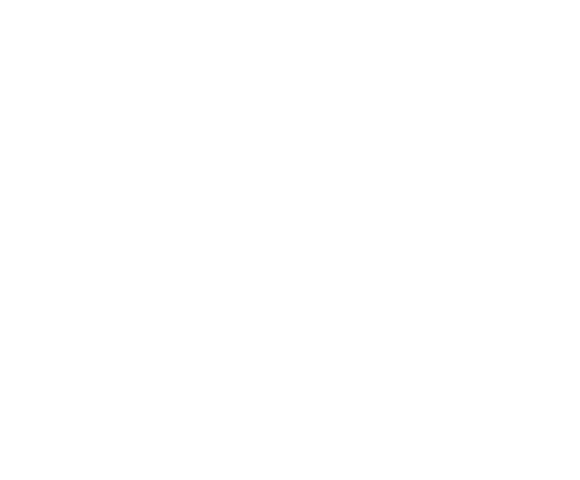

<IPython.core.display.Javascript object>


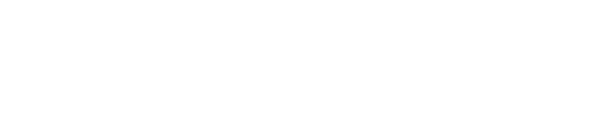

<IPython.core.display.Javascript object>


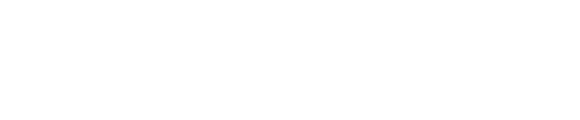

<IPython.core.display.Javascript object>


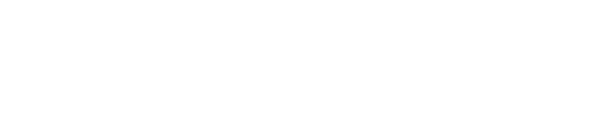

<IPython.core.display.Javascript object>


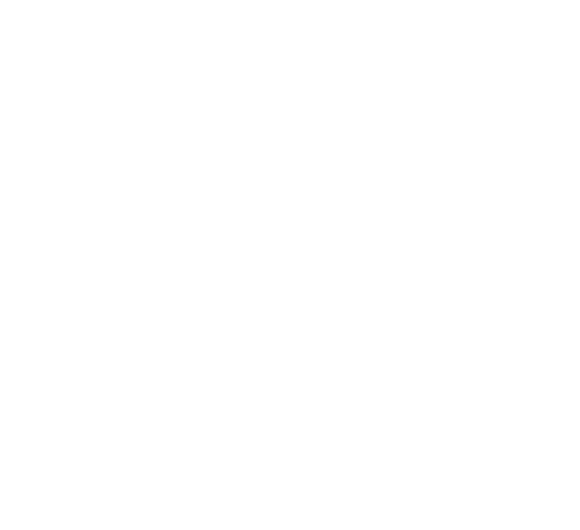

<IPython.core.display.Javascript object>


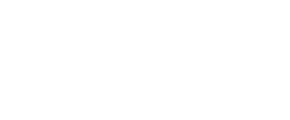

<IPython.core.display.Javascript object>


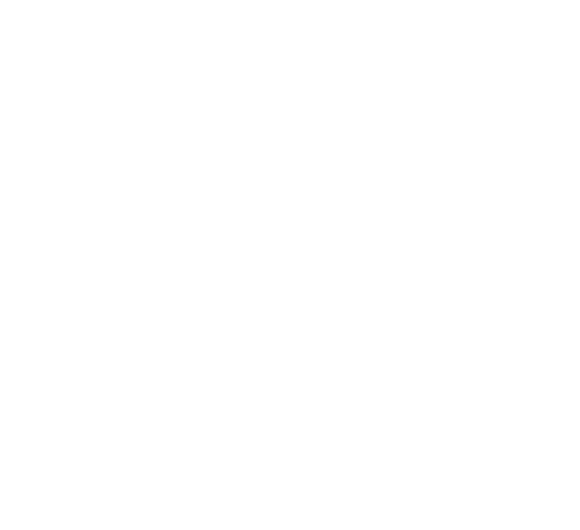

<IPython.core.display.Javascript object>


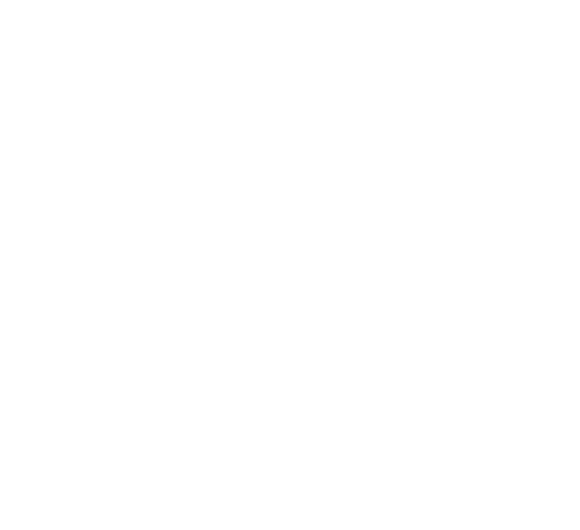

<IPython.core.display.Javascript object>


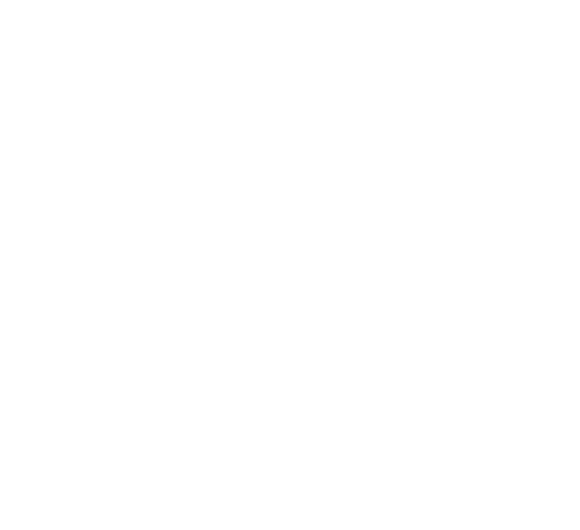

<IPython.core.display.Javascript object>


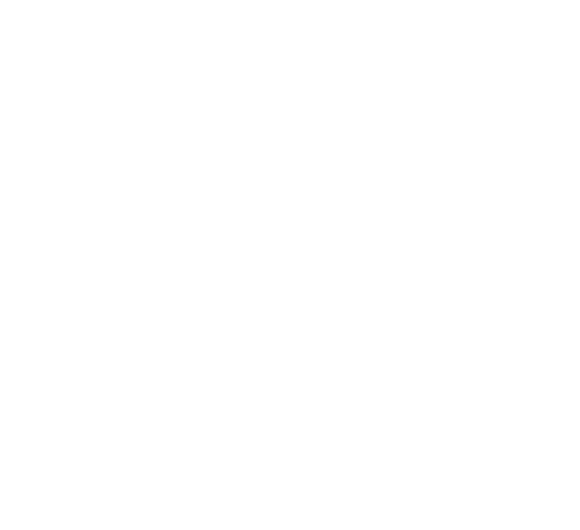

<IPython.core.display.Javascript object>


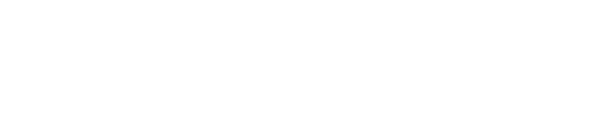

<IPython.core.display.Javascript object>


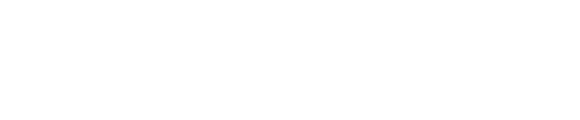

<IPython.core.display.Javascript object>


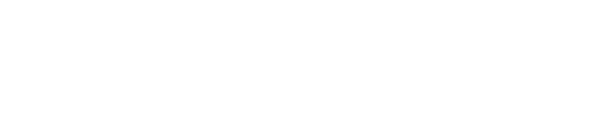

<IPython.core.display.Javascript object>


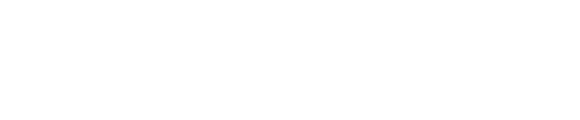

<IPython.core.display.Javascript object>


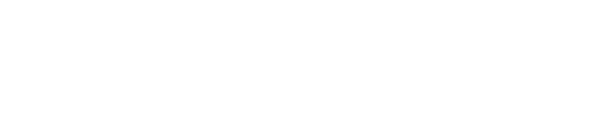

<IPython.core.display.Javascript object>


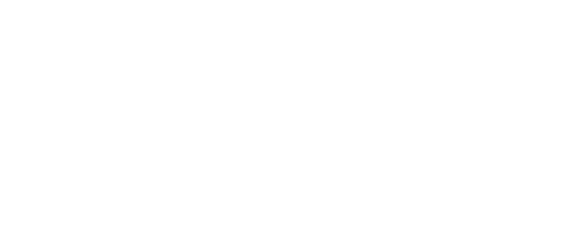

<IPython.core.display.Javascript object>


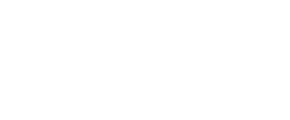

<IPython.core.display.Javascript object>


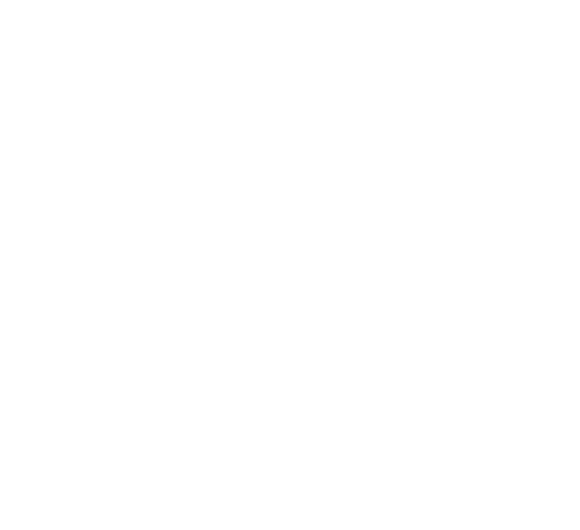

<IPython.core.display.Javascript object>


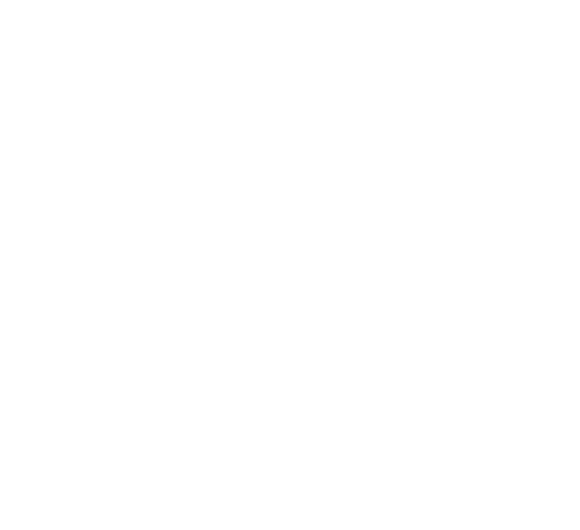

<IPython.core.display.Javascript object>


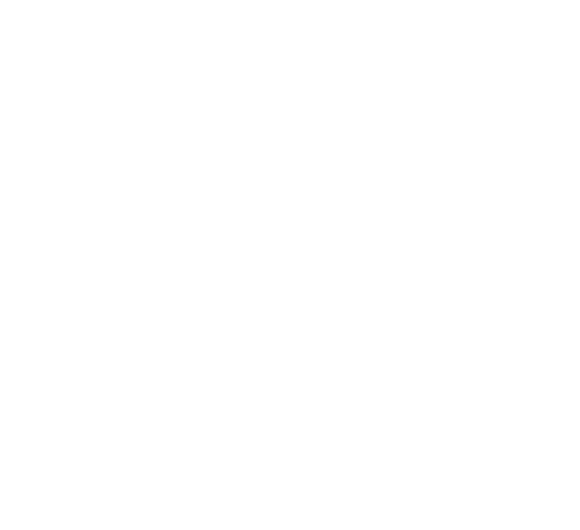

<IPython.core.display.Javascript object>


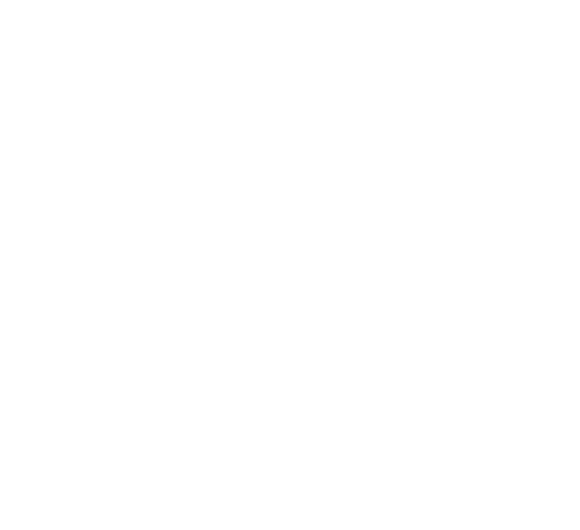

<IPython.core.display.Javascript object>


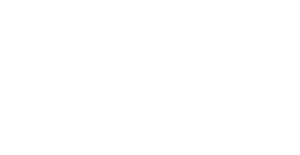

<IPython.core.display.Javascript object>


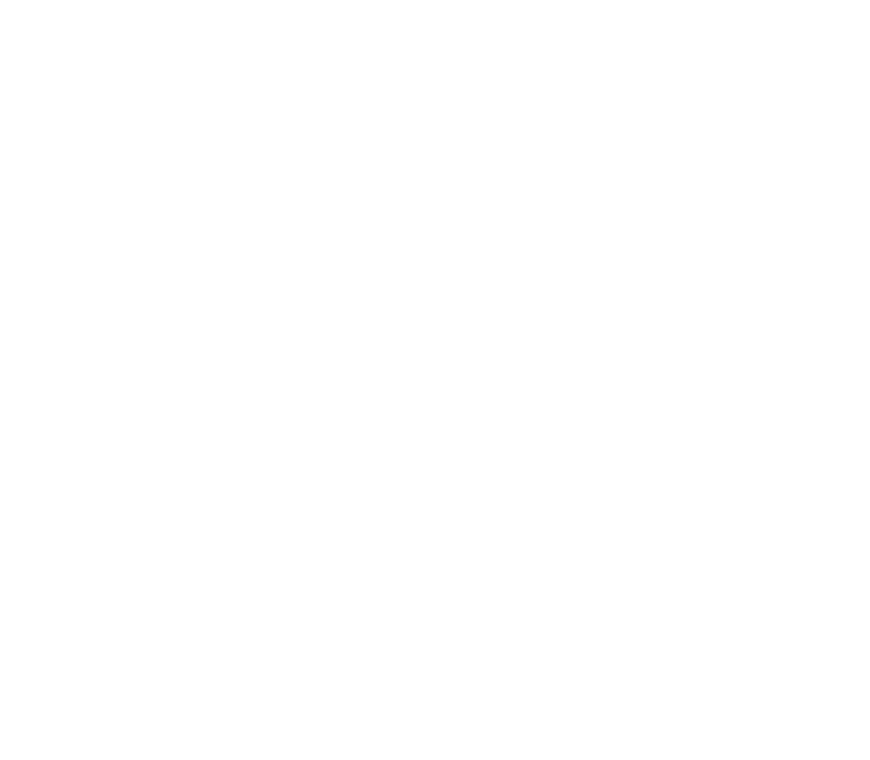

<IPython.core.display.Javascript object>


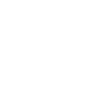

Report usedCarSV_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [9]:
sweet_report = sv.analyze(data1)
sweet_report.show_html('usedCarSV_report.html')

In [10]:
#Converting the object data type variables to 'int' data type by using label_encoder  

data1["Transmisson"] = label_encoder.fit_transform(data1["Transmisson"])
data1["Vendor"] = label_encoder.fit_transform(data1["Vendor"])
data1["Tax"] = label_encoder.fit_transform(data1["Tax"])
data1["Location"] = label_encoder.fit_transform(data1["Location"])
data1["Drive_type"] = label_encoder.fit_transform(data1["Drive_type"])
#data1["Fuel_type"] = label_encoder.fit_transform(data1["Fuel_type"])
data1.head(2)

Car_name  Kms_driven  Age  Transmisson Fuel_type  \
0                 BMW 520 d 140 kW       32125    3            0    Diesel   
1  Kia Sorento 2.2 CRDi AWD 147 kW       63400    4            0    Diesel   

   Vendor  Location  Price_Euro  Tax  Drive_type  Feature_score  Power_kW  
0       0         3     32899.0    1           0              2       140  
1       0         3     34649.0    1           1              2       147

In [11]:
data1["Fuel_type"]= data1["Fuel_type"].astype("str")
data1["Fuel_type"] = label_encoder.fit_transform(data1["Fuel_type"])

In [12]:
data1.head(2)

Car_name  Kms_driven  Age  Transmisson  Fuel_type  \
0                 BMW 520 d 140 kW       32125    3            0          1   
1  Kia Sorento 2.2 CRDi AWD 147 kW       63400    4            0          1   

   Vendor  Location  Price_Euro  Tax  Drive_type  Feature_score  Power_kW  
0       0         3     32899.0    1           0              2       140  
1       0         3     34649.0    1           1              2       147

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_name       9978 non-null   object 
 1   Kms_driven     9978 non-null   int64  
 2   Age            9978 non-null   int64  
 3   Transmisson    9978 non-null   int32  
 4   Fuel_type      9978 non-null   int32  
 5   Vendor         9978 non-null   int32  
 6   Location       9978 non-null   int32  
 7   Price_Euro     9977 non-null   float64
 8   Tax            9978 non-null   int32  
 9   Drive_type     9978 non-null   int32  
 10  Feature_score  9978 non-null   int64  
 11  Power_kW       9978 non-null   int64  
dtypes: float64(1), int32(6), int64(4), object(1)
memory usage: 701.7+ KB


In [14]:
data1.describe()

Kms_driven          Age  Transmisson    Fuel_type       Vendor  \
count    9978.000000  9978.000000  9978.000000  9978.000000  9978.000000   
mean    29220.282522     2.296152     0.248146     3.574664     0.047204   
std     28995.031043     1.597139     0.431959     2.779903     0.212085   
min       200.000000     0.000000     0.000000     0.000000     0.000000   
25%      9672.250000     1.000000     0.000000     1.000000     0.000000   
50%     19186.500000     2.000000     0.000000     2.000000     0.000000   
75%     38420.250000     3.000000     0.000000     7.000000     0.000000   
max    160000.000000    10.000000     1.000000     8.000000     1.000000   

          Location     Price_Euro          Tax   Drive_type  Feature_score  \
count  9978.000000    9977.000000  9978.000000  9978.000000    9978.000000   
mean      3.715775   32192.875915     0.562237     0.285027       2.369513   
std       2.470472   14573.405282     0.496136     0.451450       0.862538   
min       0.000000    4049.000000     0.000000     0.000000       0.000000   
25%       2.000000   21299.000000     0.000000     0.000000       2.000000   
50%       3.000000   30599.000000     1.000000     0.000000       3.000000   
75%       3.000000   41699.000000     1.000000     1.000000       3.000000   
max      10.000000  264399.000000     1.000000     1.000000       3.000000   

          Power_kW  
count  9978.000000  
mean    132.315995  
std      53.981195  
min      33.000000  
25%     100.000000  
50%     125.000000  
75%     147.000000  
max     478.000000

<IPython.core.display.Javascript object>


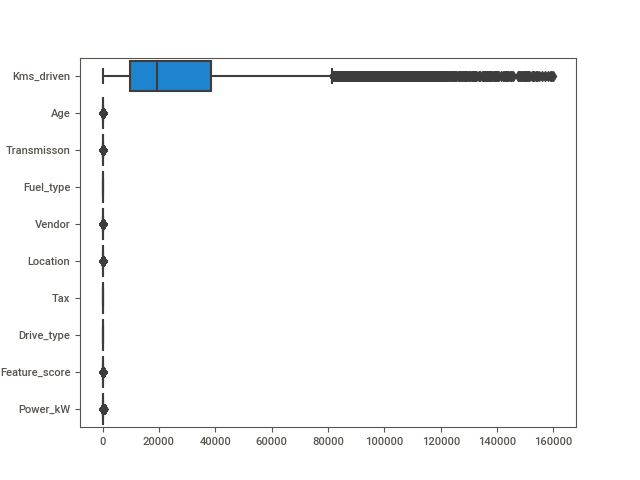

In [15]:
#identifying the outliers 
fig, axs = plt.subplots()
sns.boxplot(data= data1.drop(["Car_name","Price_Euro"],axis=1, inplace= False),orient = "h")
plt.show()

<IPython.core.display.Javascript object>


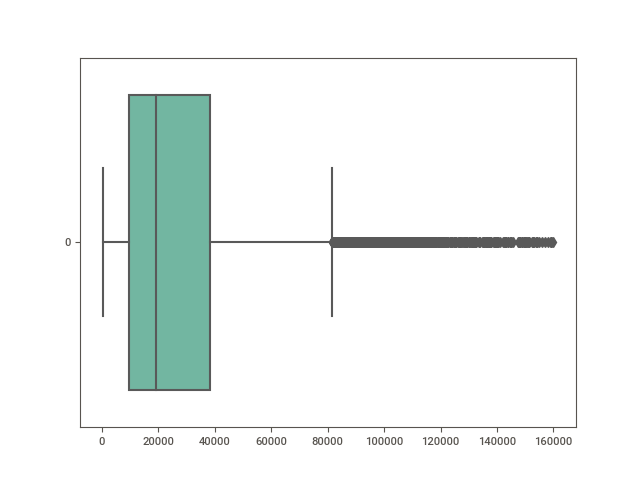

In [16]:
fig,axs = plt.subplots()
sns.boxplot(data = data1["Kms_driven"],orient = "h", palette = "Set2")
plt.show()

In [17]:
#Treating the Outliers
q75,q25 = np.percentile(data1["Kms_driven"],[75,25])
iqr = q75- q25
print("IQR",iqr)
whisker = q75+(1.5*iqr)
data1["Kms_driven"] = data1["Kms_driven"].clip(upper = whisker) 

IQR 28748.0


<IPython.core.display.Javascript object>


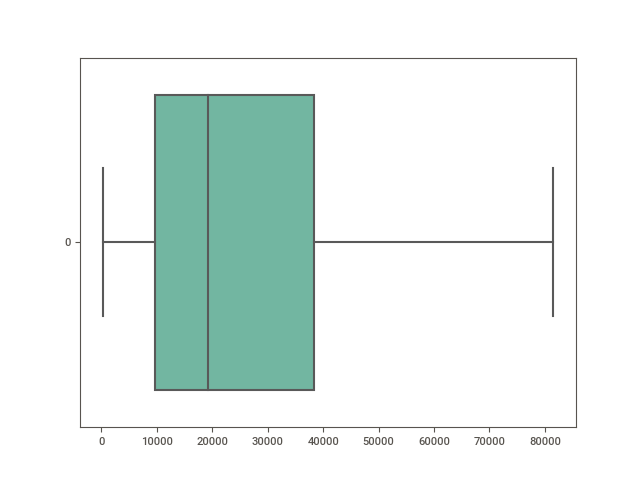

In [18]:
fig,axs = plt.subplots()
sns.boxplot(data = data1["Kms_driven"],orient = "h", palette = "Set2")
plt.show()

<IPython.core.display.Javascript object>


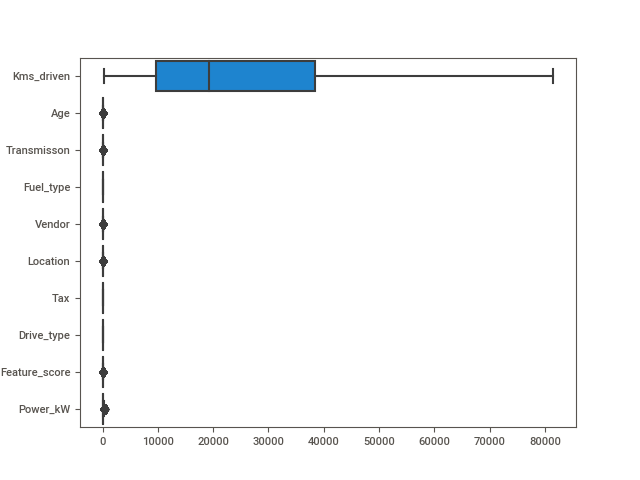

In [19]:
fig, axs = plt.subplots()
sns.boxplot(data= data1.drop(["Car_name","Price_Euro"],axis=1, inplace= False),orient = "h")
plt.show()

In [20]:
data1.isnull().sum()

Car_name         0
Kms_driven       0
Age              0
Transmisson      0
Fuel_type        0
Vendor           0
Location         0
Price_Euro       1
Tax              0
Drive_type       0
Feature_score    0
Power_kW         0
dtype: int64

In [21]:
data1.shape

(9978, 12)

In [69]:
# Droping the na values as we have only one record with na 
data2 = data1.dropna()
data2.shape

(9977, 12)

In [71]:
file_name = 'EUC_Data.xlsx'
data2.to_excel(file_name)
print('DataFrame is written to excel file sucessfully.')

DataFrame is written to excel file sucessfully.


In [23]:
#Simple linear regression 
#Correlation matrix

In [24]:
data2.corr()

Kms_driven       Age  Transmisson  Fuel_type    Vendor  \
Kms_driven       1.000000  0.735044     0.120933  -0.063766  0.205052   
Age              0.735044  1.000000     0.149740   0.111912  0.293091   
Transmisson      0.120933  0.149740     1.000000   0.202634 -0.013007   
Fuel_type       -0.063766  0.111912     0.202634   1.000000  0.101703   
Vendor           0.205052  0.293091    -0.013007   0.101703  1.000000   
Location         0.030029 -0.015225     0.044856   0.136960 -0.063925   
Price_Euro      -0.283265 -0.350673    -0.537078  -0.121507 -0.003813   
Tax             -0.166491 -0.238269    -0.222282  -0.025097 -0.097014   
Drive_type       0.103757  0.071872    -0.303575  -0.030155  0.089816   
Feature_score   -0.014997  0.016442    -0.016681  -0.021100  0.029008   
Power_kW         0.065942  0.061974    -0.432134   0.068043  0.164588   

               Location  Price_Euro       Tax  Drive_type  Feature_score  \
Kms_driven     0.030029   -0.283265 -0.166491    0.103757      -0.014997   
Age           -0.015225   -0.350673 -0.238269    0.071872       0.016442   
Transmisson    0.044856   -0.537078 -0.222282   -0.303575      -0.016681   
Fuel_type      0.136960   -0.121507 -0.025097   -0.030155      -0.021100   
Vendor        -0.063925   -0.003813 -0.097014    0.089816       0.029008   
Location       1.000000   -0.074521 -0.030005    0.017333      -0.098889   
Price_Euro    -0.074521    1.000000  0.344126    0.458708      -0.045343   
Tax           -0.030005    0.344126  1.000000    0.150566       0.051725   
Drive_type     0.017333    0.458708  0.150566    1.000000      -0.027708   
Feature_score -0.098889   -0.045343  0.051725   -0.027708       1.000000   
Power_kW      -0.029060    0.754411  0.198776    0.519034      -0.034047   

               Power_kW  
Kms_driven     0.065942  
Age            0.061974  
Transmisson   -0.432134  
Fuel_type      0.068043  
Vendor         0.164588  
Location      -0.029060  
Price_Euro     0.754411  
Tax            0.198776  
Drive_type     0.519034  
Feature_score -0.034047  
Power_kW       1.000000

# Preparing a model 

In [25]:
data2.columns

Index(['Car_name', 'Kms_driven', 'Age', 'Transmisson', 'Fuel_type', 'Vendor',
       'Location', 'Price_Euro', 'Tax', 'Drive_type', 'Feature_score',
       'Power_kW'],
      dtype='object')

In [26]:
import statsmodels.formula.api as smf
model = smf.ols('Price_Euro~Age+Transmisson+Fuel_type+Drive_type+Feature_score+Power_kW+Tax+Kms_driven+Vendor+Location',data= data2).fit()

In [27]:
model.params

Intercept        18704.094412
Age              -2292.282498
Transmisson      -4245.477557
Fuel_type         -585.313313
Drive_type        2895.586804
Feature_score     -512.192086
Power_kW           179.979785
Tax               2531.247916
Kms_driven          -0.077974
Vendor            -353.862918
Location          -215.280430
dtype: float64

In [28]:
print(model.tvalues, "\n", model.pvalues)

Intercept         55.203144
Age              -34.213688
Transmisson      -22.796039
Fuel_type        -22.035541
Drive_type        16.208116
Feature_score     -6.440756
Power_kW         110.913385
Tax               17.282312
Kms_driven       -17.912054
Vendor            -1.035952
Location          -7.646137
dtype: float64 
 Intercept         0.000000e+00
Age              1.141053e-242
Transmisson      3.591093e-112
Fuel_type        4.142314e-105
Drive_type        2.453981e-58
Feature_score     1.243647e-10
Power_kW          0.000000e+00
Tax               5.821187e-66
Kms_driven        1.208919e-70
Vendor            3.002498e-01
Location          2.262287e-14
dtype: float64


In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_Euro   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     3602.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:51:45   Log-Likelihood:            -1.0218e+05
No. Observations:                9977   AIC:                         2.044e+05
Df Residuals:                    9966   BIC:                         2.045e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.87e+04    338.823     55.203      0.000     1.8e+04    1.94e+04
Age           -2292.2825     66.999    -34.214      0.000   -2423.614   -2160.951
Transmisson   -4245.4776    186.238    -22.796      0.000   -4610.541   -3880.414
Fuel_type      -585.3133     26.562    -22.036      0.000    -637.381    -533.246
Drive_type     2895.5868    178.650     16.208      0.000    2545.396    3245.778
Feature_score  -512.1921     79.524     -6.441      0.000    -668.074    -356.310
Power_kW        179.9798      1.623    110.913      0.000     176.799     183.161
Tax            2531.2479    146.465     17.282      0.000    2244.148    2818.348
Kms_driven       -0.0780      0.004    -17.912      0.000      -0.087      -0.069
Vendor         -353.8629    341.582     -1.036      0.300   -1023.434     315.708
Location       -215.2804     28.155     -7.646      0.000    -270.471    -160.090
==============================================================================
Omnibus:                     9540.126   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2160343.039
Skew:                           4.049   Prob(JB):                         0.00
Kurtosis:                      74.632   Cond. No.                     1.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
(model.rsquared,model.rsquared_adj)

(0.7833040694714829, 0.7830866342612395)

In [31]:
#Calculating VIF 
rsq_Age = smf.ols('Age~Transmisson+Fuel_type+Drive_type+Feature_score+Power_kW+Tax+Kms_driven+Vendor+Location',data= data2).fit().rsquared
vif_Age = 1/(1-rsq_Age)
rsq_Transmisson = smf.ols('Transmisson~Age+Fuel_type+Drive_type+Feature_score+Power_kW+Tax+Kms_driven+Vendor+Location',data= data2).fit().rsquared
vif_Transmisson = 1/(1-rsq_Transmisson)
rsq_Fuel_type= smf.ols('Fuel_type~Transmisson+Age+Drive_type+Feature_score+Power_kW+Tax+Kms_driven+Vendor+Location',data= data2).fit().rsquared
vif_Fuel_type = 1/(1-rsq_Fuel_type)
rsq_Drive_type= smf.ols('Drive_type~Fuel_type+Transmisson+Age+Feature_score+Power_kW+Tax+Kms_driven+Vendor+Location',data= data2).fit().rsquared
vif_Drive_type = 1/(1-rsq_Drive_type)
rsq_Feature_score = smf.ols('Feature_score~Drive_type+Fuel_type+Transmisson+Age+Power_kW+Tax+Kms_driven+Vendor+Location',data=data2).fit().rsquared
vif_Feature_score = 1/(1-rsq_Feature_score)
rsq_Power_kW = smf.ols('Power_kW~Feature_score+Drive_type+Fuel_type+Transmisson+Age+Tax+Kms_driven+Vendor+Location',data=data2).fit().rsquared
vif_Power_kW = 1/(1-rsq_Power_kW)
rsq_Kms_driven = smf.ols('Kms_driven~Feature_score+Drive_type+Fuel_type+Transmisson+Age+Tax+Vendor+Location',data=data2).fit().rsquared
vif_Kms_driven = 1/(1-rsq_Kms_driven)
#storing the vif values in the dataframe
d1 = {'Variables':['Age','Transmisson','Fuel_type','Drive_type','Feature_score','Power_kW','Kms_driven'],'Vif': [vif_Age,vif_Transmisson,vif_Fuel_type,vif_Drive_type,vif_Feature_score,vif_Power_kW,vif_Kms_driven]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

Variables       Vif
0            Age  2.479775
1    Transmisson  1.401509
2      Fuel_type  1.180709
3     Drive_type  1.408347
4  Feature_score  1.018901
5       Power_kW  1.661707
6     Kms_driven  2.333299

we could notice from the above datframe that the VIF factor for all the variables is below 5- 10 

There is no collinearity among the variables  

# Residual Analysis

<IPython.core.display.Javascript object>


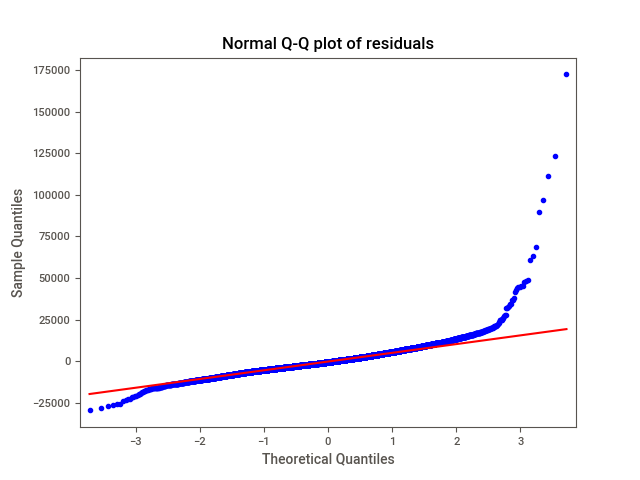

In [32]:
#Test for Normality of Residulas(Q-Q Plot)
import statsmodels.api as sm 
qqplot = sm.qqplot(model.resid,line ='q')
plt.title('Normal Q-Q plot of residuals') 
plt.show()

In [33]:
list(np.where(model.resid>50000 ))

[array([3632, 6227, 6368, 7038, 7434, 8015, 8701, 9264], dtype=int64)]

# Detecting Influncers/Outliers through cook's distance 

In [34]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [35]:
help(model.get_influence())

Help on OLSInfluence in module statsmodels.stats.outliers_influence object:

class OLSInfluence(_BaseInfluenceMixin)
 |  OLSInfluence(results)
 |  
 |  class to calculate outlier and influence measures for OLS result
 |  
 |  Parameters
 |  ----------
 |  results : RegressionResults
 |      currently assumes the results are from an OLS regression
 |  
 |  Notes
 |  -----
 |  One part of the results can be calculated without any auxiliary regression
 |  (some of which have the `_internal` postfix in the name. Other statistics
 |  require leave-one-observation-out (LOOO) auxiliary regression, and will be
 |  slower (mainly results with `_external` postfix in the name).
 |  The auxiliary LOOO regression only the required results are stored.
 |  
 |  Using the LOO measures is currently only recommended if the data set
 |  is not too large. One possible approach for LOOO measures would be to
 |  identify possible problem observations with the _internal measures, and
 |  then run the leave-o

<IPython.core.display.Javascript object>


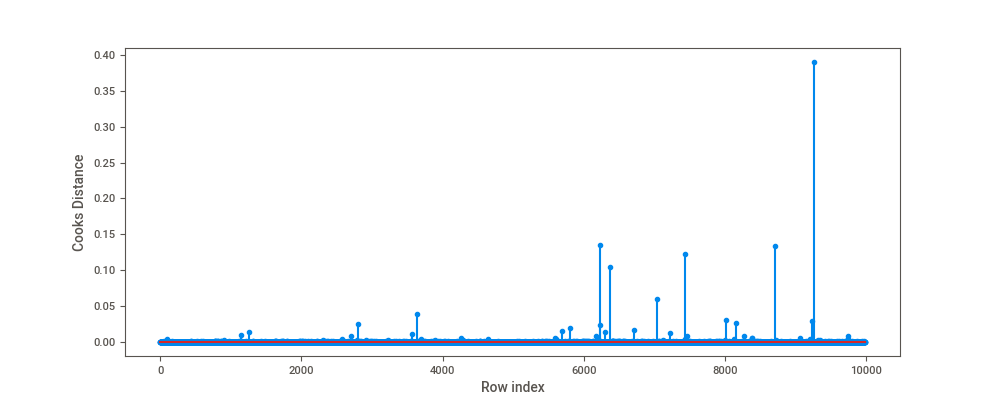

In [36]:
#Plot the influencers values using the stem plot 
fig = plt.subplots(figsize = (10,4))
plt.stem(np.arange(len(data2)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
#index and value of max influencer 
(np.argmax(c),np.max(c))

(9264, 0.3896127581985632)

# High Influence points 

<IPython.core.display.Javascript object>


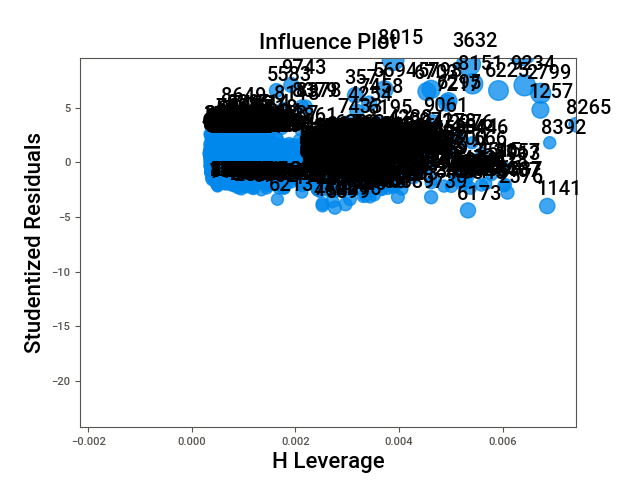

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [39]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [40]:
data2[data2.index.isin([3632,6227, 6368, 7038, 7434, 8015, 8701, 9264])]

Car_name  Kms_driven  Age  \
3632  Mercedes-Benz AMG GT 63 S 4Matic Coupe MCT 9G ...      2803.0    2   
6227                            Bentley Bentayga 405 kW      4600.0    1   
6368             Mercedes-Benz S 65 AMG L TCT 7G 463 kW     16181.0    3   
7038                             Porsche Cayenne 460 kW     12000.0    2   
7434                      Mercedes-Benz S 65 AMG 463 kW     19000.0    3   
8015                       Porsche 992 S 3.0 PDK 332 kW      2500.0    2   
8701                            Bentley Bentayga 404 kW      5900.0    1   
9264                            Lamborghini Urus 478 kW      6500.0    4   

      Transmisson  Fuel_type  Vendor  Location  Price_Euro  Tax  Drive_type  \
3632            0          7       0         3    158899.0    1           1   
6227            0          7       1         3    196799.0    0           1   
6368            0          7       0         3    180049.0    1           0   
7038            0          7       0         9    161299.0    0           1   
7434            0          7       1         3    187399.0    0           1   
8015            0          7       0        10    130349.0    0           0   
8701            0          7       0         9    208099.0    0           1   
9264            0          7       0         4    264399.0    0           1   

      Feature_score  Power_kW  
3632              2       470  
6227              2       405  
6368              2       463  
7038              0       460  
7434              2       463  
8015              1       332  
8701              2       404  
9264              2       478

In [41]:
data2.head(5)

Car_name  Kms_driven  Age  Transmisson  Fuel_type  \
0                 BMW 520 d 140 kW     32125.0    3            0          1   
1  Kia Sorento 2.2 CRDi AWD 147 kW     63400.0    4            0          1   
2          Opel Grandland X 147 kW      2700.0    2            0          3   
3                 BMW 320 d 140 kW     26145.0    1            0          1   
4      BMW 320 d Sport Line 140 kW     28199.0    1            0          1   

   Vendor  Location  Price_Euro  Tax  Drive_type  Feature_score  Power_kW  
0       0         3     32899.0    1           0              2       140  
1       0         3     34649.0    1           1              2       147  
2       0         4     35349.0    1           1              2       147  
3       0         3     39349.0    1           0              2       140  
4       0         3     40099.0    1           0              2       140

# Improving the model

In [42]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data3=data2.drop(data2.index[[3632,6227, 6368, 7038, 7434, 8015, 8701, 9264]],axis=0).reset_index()

In [43]:
#Drop the original index
data3=data3.drop(['index'],axis=1)

In [44]:
data3.head(3)

Car_name  Kms_driven  Age  Transmisson  Fuel_type  \
0                 BMW 520 d 140 kW     32125.0    3            0          1   
1  Kia Sorento 2.2 CRDi AWD 147 kW     63400.0    4            0          1   
2          Opel Grandland X 147 kW      2700.0    2            0          3   

   Vendor  Location  Price_Euro  Tax  Drive_type  Feature_score  Power_kW  
0       0         3     32899.0    1           0              2       140  
1       0         3     34649.0    1           1              2       147  
2       0         4     35349.0    1           1              2       147

In [45]:
model2 = smf.ols('Price_Euro~Age+Transmisson+Fuel_type+Drive_type+Feature_score+Power_kW+Tax+Kms_driven+Vendor+Location',data= data3).fit()

In [46]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_Euro   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     4182.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:52:38   Log-Likelihood:            -1.0101e+05
No. Observations:                9969   AIC:                         2.020e+05
Df Residuals:                    9958   BIC:                         2.021e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.994e+04    305.056     65.375      0.000    1.93e+04    2.05e+04
Age           -2317.8040     60.115    -38.556      0.000   -2435.641   -2199.967
Transmisson   -4640.4009    167.243    -27.747      0.000   -4968.230   -4312.572
Fuel_type      -580.6178     23.822    -24.373      0.000    -627.314    -533.922
Drive_type     3258.2322    160.503     20.300      0.000    2943.613    3572.851
Feature_score  -479.0940     71.339     -6.716      0.000    -618.934    -339.254
Power_kW        167.7342      1.479    113.402      0.000     164.835     170.634
Tax            2822.3738    131.518     21.460      0.000    2564.573    3080.175
Kms_driven       -0.0709      0.004    -18.134      0.000      -0.079      -0.063
Vendor         -386.8917    306.908     -1.261      0.207    -988.494     214.711
Location       -242.0627     25.270     -9.579      0.000    -291.597    -192.529
==============================================================================
Omnibus:                     2490.248   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14908.665
Skew:                           1.063   Prob(JB):                         0.00
Kurtosis:                       8.601   Cond. No.                     1.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
print("MLR_model2",(model2.rsquared,model2.aic))
print("MLR_model1",(model.rsquared,model.aic))

MLR_model2 (0.8076624040370566, 202039.92555630012)
MLR_model1 (0.7833040694714829, 204375.14287344273)


We could notice that the model has improved as the rsquared value has increased and the aic score has reduced in model2

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [67]:
x = data3.drop(["Car_name","Price_Euro"], axis = 1)
y = data3["Price_Euro"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [50]:
#Model building using random forest 
x = data3.drop(["Car_name","Price_Euro"], axis = 1)
y = data3["Price_Euro"]
num_trees = 100
max_features = 4
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print("RandomForestRegressor",results.mean())

C:\Users\jashwini_d\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForestRegressor 0.8891652405860848


In [51]:
#Model building using Adaboostregressor 
x = data3.drop(["Car_name","Price_Euro"], axis = 1)
y = data3["Price_Euro"]
num_trees = 100
kfold = KFold(n_splits=10, random_state=123)
model = AdaBoostRegressor(n_estimators=num_trees, random_state=123)
results = cross_val_score(model, x, y, cv=kfold)
print("AdaBoostRegressor",results.mean())

C:\Users\jashwini_d\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AdaBoostRegressor 0.7407598798863664


In [52]:
x = data3.drop(["Car_name","Price_Euro"], axis = 1)
y = data3["Price_Euro"]
kfold = KFold(n_splits=10, random_state=123)
model = XGBRegressor(n_estimators = 90,max_depth = 3)
results = cross_val_score(model, x, y, cv=kfold)
print("XGBRegressor",results.mean())

C:\Users\jashwini_d\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGBRegressor 0.8819011692461753


In [66]:
#selecting best models
model_selc = [LinearRegression(),
            XGBRegressor(n_estimators = 90,max_depth = 3),
            AdaBoostRegressor(n_estimators=90, random_state=123),
            RandomForestRegressor(n_estimators=90,max_features=4)]
                                  
                                  
kfold = KFold(n_splits=5,random_state= 123)
cv_results = []
cv_results_mean =[]
for ele in model_selc:
    cross_results = cross_val_score(ele, x, y, cv=kfold, scoring ='r2')
    cv_results.append(cross_results)
    cv_results_mean.append(cross_results.mean())
    print("\n MODEL: ",ele,"\nMEAN R2:",cross_results.mean() )


C:\Users\jashwini_d\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning



 MODEL:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
MEAN R2: 0.8030601960801078

 MODEL:  XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=90, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=None, tree_method=None, validate_parameters=None,
             verbosity=None) 
MEAN R2: 0.8796610356407479

 MODEL:  AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=90, random_st